# ПРОЕКТ: Анализ бизнес-показателей.

# ЦЕЛЬ ПРОЕКТА:

# Разобраться в причинах убытков (несмотря на огромные вложения в рекламу) и помочь компании выйти в плюс.

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+.\
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.\
Моя задача — разобраться в причинах и помочь компании выйти в плюс.
    
В моем распоряжении три датасета.
- visits_info_short.csv хранит лог сервера с информацией о посещениях сайта.
- orders_info_short.csv — информацию о заказах.
- costs_info_short.csv — информацию о расходах на рекламу.


## ШАГ 1. Загрузка данных и подготовка их к анализу.

### Импортируем библиотеки и сохраняем данные в переменных visits, orders, costs.

In [220]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
from datetime import datetime, timedelta # импортируем библиотеку datetime
from matplotlib import pyplot as plt # #  импортируем библиотеку pyplot

In [221]:
# используя конструкцию try-except читаем нужные нам файлы
# сохраняем их в переменных visits, orders, costs
try: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('http://localhost:8888/edit/PROJECT.%20business_analysis/visits_info_short.csv')
    orders = pd.read_csv('http://localhost:8888/edit/PROJECT.%20business_analysis/orders_info_short.csv')
    costs = pd.read_csv('http://localhost:8888/edit/PROJECT.%20business_analysis/costs_info_short.csv')

### Изучаем данные.

In [222]:
visits # выводим на экран первые строки датафрейма visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [223]:
#выводим для изучения основную информацию датафрейма visits с помощью метода info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [224]:
orders # выводим на экран первые строки датафрейма orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [225]:
#выводим для изучения основную информацию датафрейма orders с помощью метода info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [226]:
costs # выводим на экран первые строки датафрейма costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [227]:
#выводим для изучения основную информацию датафрейма costs с помощью метода info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


* **Краткие выводы:**
    
1. Мы подгрузили библиотеки для обработки данных.
2. Загрузили данные о визитах, заказах и рекламных расходах из CSV-файлов и сохранили их в переменные 'visits', 'orders', 'costs'.
3. Ознакомились с общими данными с помощью метода info().
4. Обнаружили, что данные нуждаются в обработке. 
(например значения в столбце даты не соответствует нужному для обработки Типу данных)

### Подготовка и предобработка данных.

#### Проверка на наличие пропущенных значений.

In [228]:
visits.isna().sum() # кол-во пропусков в таблице visits

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [229]:
orders.isna().sum() # кол-во пропусков в таблице orders

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [230]:
costs.isna().sum() # кол-во пропусков в таблице costs

dt         0
Channel    0
costs      0
dtype: int64

* `Как видим, пропущенных значений в таблицах нет.`

#### Приведем к нижнему регистру названия столбцов.

In [231]:
# приведем к нижнему регистру все значения 'x', 
# которые присутствуют в названии столбцов 

visits.columns = [x.lower() for x in visits.columns]
orders.columns = [x.lower() for x in orders.columns]
costs.columns  = [x.lower() for x in costs.columns]

* `Названия столбцов привели к нижнему регистру.`

#### Приведем к нижнему регистру значения столбцов.

In [232]:
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

In [233]:
# проверяем, что названия и значения столбцов пришли к нижнему регистру
visits.head()

,user id,region,device,channel,session start,session end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [234]:
# проверяем, что названия и значения столбцов пришли к нижнему регистру
costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


* `Значения столбцов привели к нижнему регистру.`

#### Заменяем пробелы в названиях столбцов на нижнее подчёркивание.

In [235]:
# избавляемся от пробелов в названии столбцов
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})

In [236]:
# избавляемся от пробелов в названии столбцов
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

#### Проверка на наличие явных дубликатов.

In [237]:
visits.duplicated().sum() # получаем суммарное кол-во дубликатов в visits

0

In [238]:
orders.duplicated().sum() # получаем суммарное кол-во дубликатов в ordes

0

In [239]:
costs.duplicated().sum() # получаем суммарное кол-во дубликатов в costs

0

* `Явных дубликатов не обнаружено.`

#### Проверка на наличие неявных дубликатов.

Для проверки данных на неявные дубликаты вызовем функцию unique() и посмотрим какие вообще существуют уникальные значения в нижеперечисленных столбцах.

In [240]:
visits['region'].unique() # выводим все уникальные значения в столбце

array(['united states', 'uk', 'france', 'germany'], dtype=object)

In [241]:
visits['device'].unique() # выводим все уникальные значения в столбце

array(['iphone', 'mac', 'android', 'pc'], dtype=object)

In [242]:
visits['channel'].unique() # выводим все уникальные значения в столбце

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

In [243]:
costs['channel'].unique() # выводим все уникальные значения в столбце

array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

* `Неявных дубликатов нами не обнаружено.`

#### Преобразуем данные в нужные типы.

Согласно предварительному просмотру мы сделали следующие предположения:

Значения в следующих столбцах нужно привести к временному формату (datetime):
- `visits[session start]`
- `visits[session end]`
- `orders[event dt]`
- `costs[dt]`

In [244]:
# Изменяем типы данных с помощью функции pd.to_datetime.

visits['session_start']=pd.to_datetime(visits['session_start'], format="%Y.%m.%d %H:%M:%S")
visits['session_end'] = pd.to_datetime(visits['session_end'], format="%Y.%m.%d %H:%M:%S")
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format="%Y.%m.%d %H:%M:%S")
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [245]:
visits.info() # проверяем что типы столбцов изменились

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [246]:
orders.info() # проверяем что типы столбцов изменились

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [247]:
costs.info() # проверяем что типы столбцов изменились

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


* `Как видим, тип данных в столбцах изменился на требуемый.`

#### ОБЩИЕ выводы по Шагу 1: 

1. Нами была проведена подготовка и предобработка данных.
2. Все названия и содержание столбцов были приведены к нижнему регистру.
3. Было проверено общее количество пропущенных значений - таковых не нашлось.
4. Была проведена проверка на дубликаты (явные и неявные) - таковых не нашлось.
5. В некоторых столбцах был изменен тип данных на (datetime).

## ШАГ 2. Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Используем функции, с которыми мы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция get_profiles() — для создания профилей пользователей.

In [248]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention() — для подсчёта Retention Rate.

In [249]:
# функция для расчёта удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time



### Функция get_conversion() — для подсчёта конверсии.

In [250]:
# функция для расчёта конверсии
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv() — для подсчёта LTV.

In [251]:
# функция для расчёта LTV и ROI

def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция filter_data() — для сглаживания данных.

In [252]:
# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция plot_retention() — для построения графика Retention Rate.

In [253]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция plot_conversion() — для построения графика конверсии.

In [254]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция plot_ltv_roi — для визуализации LTV и ROI.

In [255]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## ШАГ 3. Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

### Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.

Для того, чтобы ознакомится с профилями пользователей, вызовем функцию get_profiles(), созданную на предыдущем шаге.

In [256]:
# вызоваем функцию get_profiles():
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [257]:
profiles['user_id'].count() # считаем общее кол-во уникальных пользователей.

150008

In [258]:
profiles.groupby('region').agg({'payer': 'mean'}).sort_values(by='payer', ascending=False)

,payer
region,
united states,0.069019
germany,0.041119
uk,0.039829
france,0.037994


In [259]:
profiles['acquisition_cost'].sum() # общая стоимость затрат

105497.29999999999

In [260]:
profiles['first_ts'].min() # самая ранняя (минимальная) дата привлечения пользователя

Timestamp('2019-05-01 00:00:41')

In [261]:
profiles['first_ts'].max() # самая поздняя (максимальная) дата привлечения пользователя

Timestamp('2019-10-27 23:59:04')

* **Краткие выводы:**

1. Благодаря функции get_profiles мы получили таблицу с пользователями и их первым входом в приложение, устройством, с которого был осуществлен вход, с затратами на привлечение данного пользователя и информацией о том, является ли данный пользователей плательщиком или нет.
2. Общее количество уникальных пользователей в таблице составило `150.008`.
3. Согласно полученным данным, можем предварительно сделать предположение, что большая часть пользователей приложения заходили из соединенных штатов (`united states`).
3. Самая ранняя (минимальная) дата привлечения пользователя - `2019-05-01 00:00:41`
4. Cамая поздняя (максимальная) дата привлечения пользователя - `2019-10-27 23:59:04`

Просмотрим теперь дату самой ранней и самой поздней даты проведения рекламных компаний и проверим, соответствуют ли данные эти даты или нет.

In [326]:
profiles['dt'].min() # самая ранняя (минимальная) дата покупки

datetime.date(2019, 5, 1)

In [327]:
profiles['dt'].max() # самая поздняя (максимальная) дата покупки

datetime.date(2019, 10, 27)

Как видим, самые ранние и самые поздние даты привлечения клиентов полностью соответствуют датам проведения рекламных компаний.

### Выясняем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

In [262]:
# создадим новую таблицу, в которую поместим кол-во пользователей по каждому региону
# и процентное соотношение, которое соответствует распределению пользователей по странам
country = pd.DataFrame()
country['users'] = profiles.groupby('region')['user_id'].count()
country['user_%'] = round(((country['users'] / profiles['region'].count()) * 100),2)
country.sort_values(by = 'users', ascending=False)

,users,user_%
region,,
united states,100002,66.66
uk,17575,11.72
france,17450,11.63
germany,14981,9.99


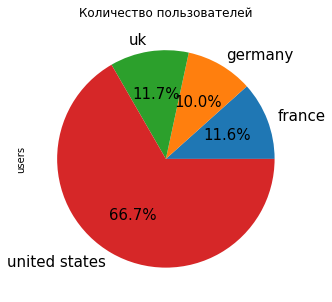

In [263]:
country.plot(y = 'users', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False,
            title ='Количество пользователей'); 

`Наибольшее количество пользователей приходят из соединенных штатов (united states) - ~66,67%.`

`Количество приходящих пользователей из других регионов примерно равномерное - от 9.99% до 11.72%`


In [264]:
# создадим новую таблицу, в которую поместим кол-во платящих пользователей
# и процентное соотношение, которое соответствует распределению оплаты от пользователей
payer = pd.DataFrame()
payer['payer_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
payer['payer_%'] = round(((payer['payer_users'] / profiles.query('payer == True')['region'].count()) * 100),2)
payer.sort_values(by = 'payer_users', ascending=False)

,payer_users,payer_%
region,,
united states,6902,77.72
uk,700,7.88
france,663,7.47
germany,616,6.94


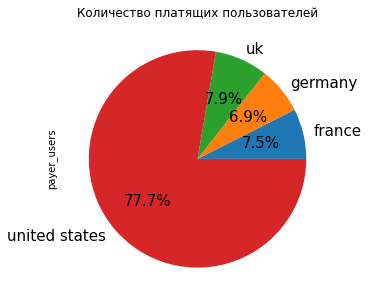

In [265]:
payer.plot(y = 'payer_users', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False,
          title ='Количество платящих пользователей'); 

`Наибольшее количество платящих пользователей приходится также на соединенные штаты (united states) - ~77.7%.`

`Количество платящих пользователей из других регионов также примерно равномерно распределено - от 6.9% до 7.9%`



* **Краткие выводы:**

1. Наибольшее количество пользователей приходят из соединенных штатов (united states) - `~66,67%.`
2. Количество приходящих пользователей из других регионов примерно равномерное - `от 9.99% до 11.72%.`
3. Наибольшее количество платящих пользователей приходится также на соединенные штаты (united states) - `~77.7%.`
4. Количество платящих пользователей из других регионов также примерно равномерно распределено - от `6.9% до 7.9%.`

### Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Для построения свобдной таблицы, объединим две ранее созданные таблицы методом merge().

In [266]:
country_payer = pd.merge(country, payer, how='left', on='region')
country_payer.sort_values(by='users', ascending=False)

,users,user_%,payer_users,payer_%
region,,,,
united states,100002,66.66,6902,77.72
uk,17575,11.72,700,7.88
france,17450,11.63,663,7.47
germany,14981,9.99,616,6.94


Добавим во вновь созданную таблицу столбец, с процентным соотношением платящих клиентов к общему количеству уникальных пользователей.

In [267]:
country_payer['payers_per_user'] = round(((country_payer['payer_users']/country_payer['users'])*100),2)
country_payer.sort_values(by='payers_per_user', ascending=False)

,users,user_%,payer_users,payer_%,payers_per_user
region,,,,,
united states,100002,66.66,6902,77.72,6.90
germany,14981,9.99,616,6.94,4.11
uk,17575,11.72,700,7.88,3.98
france,17450,11.63,663,7.47,3.80


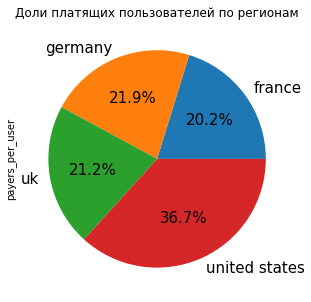

In [268]:
country_payer.plot(y = 'payers_per_user', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False,
                  title ='Доли платящих пользователей по регионам'); 

* **Краткий вывод:**

1. `Наибольшая доля платящих клиентов приходится на пользователей находятся в соединненых штатах (united states).`\
`(~6.9% в абсолютном выражении (6902 из 100002)`
2. `Если сравнивать относительные значения между странами - то наибольшее кол-во платящих пользователей находятся в соединенных штатах - 36.7%`. (`В остальных странах только ~ 1 из 5 уникальных пользователей платит (~20%)`) 

### Определяем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

In [269]:
# создадим новую таблицу, в которую поместим кол-во пользователей по каждому отдельному устройству (девайсу)
# и процентное соотношение, которое соответствует распределению пользователей по устройствам
device = pd.DataFrame()
device['users'] = profiles.groupby('device')['user_id'].count()
device['user_%'] = round(((device['users'] / profiles['device'].count()) * 100),2)
device.sort_values(by = 'users', ascending=False)

,users,user_%
device,,
iphone,54479,36.32
android,35032,23.35
pc,30455,20.30
mac,30042,20.03


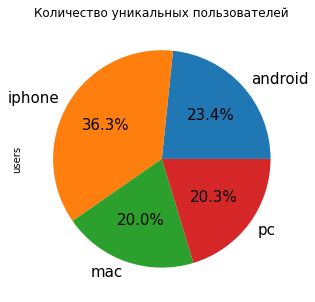

In [270]:
device.plot(y = 'users', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False,
           title ='Количество уникальных пользователей'); 

1. `Наибольшая доля уникальных пользователей совершили свой первый вход в приложение с устройств типа- iphone (почти ~36.3%)`.
2. `Распределние между оставшимися устройствами практически равномерное (от 20% до 23.4%)`.

In [271]:
# создадим новую таблицу, в которую поместим кол-во платящих пользователей по каждому устройству (девайсу)
# и процентное соотношение, которое соответствует распределению оплаты от пользователей от устройств
payer_dev = pd.DataFrame()
payer_dev['payer_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
payer_dev['payer_%'] = round(((payer_dev['payer_users'] / profiles.query('payer == True')['device'].count()) * 100),2)
payer_dev.sort_values(by = 'payer_users', ascending=False)

,payer_users,payer_%
device,,
iphone,3382,38.08
android,2050,23.08
mac,1912,21.53
pc,1537,17.31


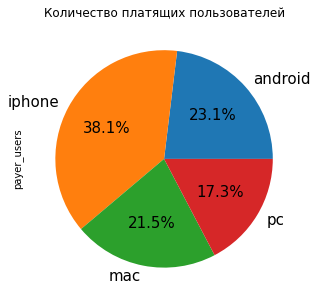

In [272]:
payer_dev.plot(y = 'payer_users', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False,
              title ='Количество платящих пользователей'); 

1. `Наибольшая доля уникальных пользователей совершивших покупки, покупала с устройств типа - iphone (почти ~38.1%)`.
2. `Распределние между оставшимися устройствами практически равномерное (от 17.3% до 23.1%)`.

* **Краткие выводы:**

1. `Наибольшая доля уникальных пользователей совершили свой первый вход в приложение с устройств типа- iphone (почти ~36.3%)`.
2. `Распределние между оставшимися устройствами практически равномерное (от 20% до 23.4%)`.
3. `Наибольшая доля уникальных пользователей совершивших покупки, покупала с устройств типа - iphone (почти ~38.1%)`.
4. `Распределние между оставшимися устройствами практически равномерное (от 17.3% до 23.1%)`.

### Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Для построения свобдной таблицы, объединим две ранее созданные таблицы методом merge().

In [273]:
device_payer = pd.merge(device, payer_dev, how='left', on='device')
device_payer.sort_values(by='users', ascending=False)

,users,user_%,payer_users,payer_%
device,,,,
iphone,54479,36.32,3382,38.08
android,35032,23.35,2050,23.08
pc,30455,20.30,1537,17.31
mac,30042,20.03,1912,21.53


Добавим во вновь созданную таблицу столбец, с процентным соотношением платящих клиентов к общему количеству уникальных пользователей.(группируем по устройствам).

In [274]:
device_payer['payers_per_user'] = round(((device_payer['payer_users']/device_payer['users'])*100),2)
device_payer.sort_values(by='payers_per_user', ascending=False)

,users,user_%,payer_users,payer_%,payers_per_user
device,,,,,
mac,30042,20.03,1912,21.53,6.36
iphone,54479,36.32,3382,38.08,6.21
android,35032,23.35,2050,23.08,5.85
pc,30455,20.30,1537,17.31,5.05


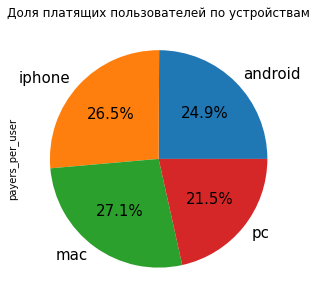

In [275]:
device_payer.plot(y = 'payers_per_user', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False, 
                 title ='Доля платящих пользователей по устройствам'); 

* **Краткие выводы:**
    
1. `Несмотря на то, что наибольшая доля платящих пользователей заходила с устройств типа - iphone, доля платящих пользователей к общему количеству уникальных пользователей распределяется примерно равномерно.`
2. `Другими словами, сложно сказать, зависит ли напрямую тип устройства, с которого производится оплата на процесс оплаты в целом.`

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

In [276]:
# создадим новую таблицу, в которую поместим кол-во пользователей с распределением по рекламным источникам привлечения
# а также посчитаем процентное соотношение, которое соответствует распределению пользователей по источникам привлечения
resource = pd.DataFrame()
resource['users'] = profiles.groupby('channel')['user_id'].count()
resource['user_%'] = round(((resource['users'] / profiles['channel'].count()) * 100),2)
resource.sort_values(by = 'users', ascending=False)

,users,user_%
channel,,
organic,56439,37.62
faceboom,29144,19.43
tiptop,19561,13.04
opplecreativemedia,8605,5.74
leapbob,8553,5.70
wahoonetbanner,8553,5.70
rocketsuperads,4448,2.97
mediatornado,4364,2.91
yrabbit,4312,2.87


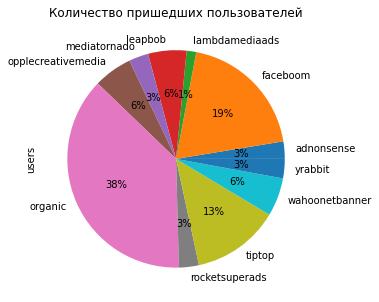

In [277]:
resource.plot(y = 'users', kind='pie', figsize=(5,5), autopct='%.0f%%', fontsize=10, legend = False, 
             title ='Количество пришедших пользователей'); 

1. `Наибольшее количество пользователей запустивших приложение являются органическими (т.е. те, которые пришли без всякой рекламы) - примерно (~38%).`
2. `Из рекламных источников, наибольшее количество пользователей пришли с ресурса - faceboom (~19%)`
3. `На втором месте по привлечению пользователей оказался ресурс - tiptop (~13%)`
4. `Все остальные ресурсы приводили до 6% пользователей`
5. `Самый неэффективный ресурс в плане привлечения пользователей - lambdamediaads (~1.43%)`.

In [278]:
# создадим новую таблицу, в которую поместим кол-во платяших пользователей с распределением по рекламным источникам привлечения
# а также посчитаем процентное соотношение, которое соответствует распределению платящих пользователей по источникам привлечения
payer_res = pd.DataFrame()
payer_res['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
payer_res['payer_%'] = round(((payer_res['payer_users'] / profiles.query('payer == True')['channel'].count()) * 100),2)
payer_res.sort_values(by = 'payer_users', ascending=False)

,payer_users,payer_%
channel,,
faceboom,3557,40.05
tiptop,1878,21.15
organic,1160,13.06
wahoonetbanner,453,5.10
adnonsense,440,4.95
rocketsuperads,352,3.96
leapbob,262,2.95
opplecreativemedia,233,2.62
lambdamediaads,225,2.53


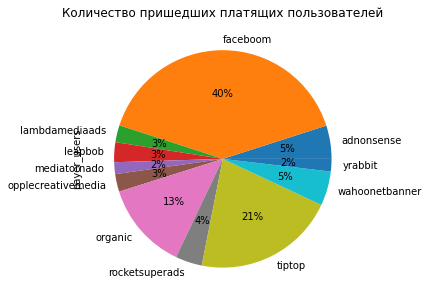

In [279]:
payer_res.plot(y = 'payer_users', kind='pie', figsize=(5,5), autopct='%.0f%%', fontsize=10, legend = False, 
             title ='Количество пришедших платящих пользователей'); 

1. `Наибольшее количество платящих пользователей были привлечены рекламой с источника - faceboom (~40%).`
2. `На втором месте по привлечению платящих пользователей оказался ресурс - tiptop (~21%)`.
3. `Уникальные платящих пользователей пришедших без рекламы было около ~13%`
4. `Со всех оставшихся ресурсов платящих пользователей приходило не более 5.1%`
5. `Самый неэффективный ресурс в плане привлечения платящих пользователей - mediatornado (~1.76%)`.

### Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Для построения свобдной таблицы, объединим две ранее созданные таблицы методом merge().

In [280]:
resource_payer = pd.merge(resource, payer_res, how='left', on='channel')
resource_payer.sort_values(by='users', ascending=False)

,users,user_%,payer_users,payer_%
channel,,,,
organic,56439,37.62,1160,13.06
faceboom,29144,19.43,3557,40.05
tiptop,19561,13.04,1878,21.15
opplecreativemedia,8605,5.74,233,2.62
leapbob,8553,5.70,262,2.95
wahoonetbanner,8553,5.70,453,5.10
rocketsuperads,4448,2.97,352,3.96
mediatornado,4364,2.91,156,1.76
yrabbit,4312,2.87,165,1.86


Добавим во вновь созданную таблицу столбец, с процентным соотношением платящих клиентов привлеченных рекламой к общему количеству уникальных пользователей.(группируем по каналам привлечения пользователей).

In [281]:
resource_payer['payers_per_user'] = round(((resource_payer['payer_users']/resource_payer['users'])*100),2)
resource_payer.sort_values(by='payers_per_user', ascending=False)

,users,user_%,payer_users,payer_%,payers_per_user
channel,,,,,
faceboom,29144,19.43,3557,40.05,12.20
adnonsense,3880,2.59,440,4.95,11.34
lambdamediaads,2149,1.43,225,2.53,10.47
tiptop,19561,13.04,1878,21.15,9.60
rocketsuperads,4448,2.97,352,3.96,7.91
wahoonetbanner,8553,5.70,453,5.10,5.30
yrabbit,4312,2.87,165,1.86,3.83
mediatornado,4364,2.91,156,1.76,3.57
leapbob,8553,5.70,262,2.95,3.06


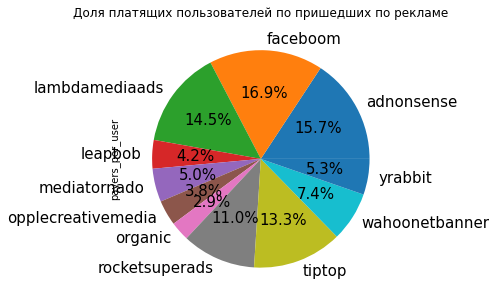

In [282]:
resource_payer.plot(y = 'payers_per_user', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=15, legend = False, 
                 title ='Доля платящих пользователей по пришедших по рекламе'); 

1. `Наибольшая доля платящих клиентов пришли с ресурса - faceboom (~16.9%)`.
2. `Следущие ресурсы тоже привлекли не мало платящих клиентов: ('adnonsense', 'lambdamediaads','lambdamediaads','tiptop').`\
`От 11% до 15.7% уникальных пользователей пришедших с данных ресурсов совершали покупки`.
3. `Можно предположить, что вложения во все вышеперечисленные ресурсы были наиболее выгодными с точки зрения привлечения покупающих клиентов.`
4. `Остальные ресурсы привлекали гораздо меньше пользователей, совершаших покупки - до 7.4%`
5. `Наименьшая доля пользователей, совершавших покупки приходила без рекламы - ~2.9%`

### ОБЩИЕ выводы по Шагу 3:

В данном разделе нами был произведен исследовательский анализ данных, в ходе которого мы обнаружили следующие закономерности:

1. Общее количество уникальных пользователей у приложения "Procrastinate Pro+" - `150.008`.
2. Самая ранняя (минимальная) дата привлечения пользователя - `2019-05-01 00:00:41`
3. Cамая поздняя (максимальная) дата привлечения пользователя - `2019-10-27 23:59:04`
4. Наибольшее количество пользователей приложения находится `в соединенных штатах (united states) - ~66,67%.`
5. Количество пользователей пришедших их других регионов примерно равномерно распределено - от 9.99% до 11.72%.
6. Наибольшее количество платящих пользователей приходится также на `соединенные штаты (united states) - ~77.7%.`
7. Количество платящих пользователей из других регионов также примерно равномерно распределено - от 6.9% до 7.9%.
8. Наибольшая доля платящих клиентов приходится на пользователей находящихся в соединненых штатах (`united states`).\
`(~6.9%` в абсолютном выражении (6902 из 100002)
9. Если сравнивать относительные значения между странами - то наибольшая доля платящих пользователей также находятся `в соединенных штатах - 36.7%`. (В остальных странах в среднем только ~ 1 из 5 уникальных пользователей платит `(~20%)`)
10. Наибольшая доля уникальных пользователей совершили свой первый вход в приложение с устройств типа- `iphone (почти ~36.3%)`.
11. Распределние между оставшимися устройствами `практически равномерное (от 20% до 23.4%)`.
12. Наибольшая доля уникальных пользователей совершивших покупки, покупала с устройств типа - `iphone (почти ~38.1%)`.
13. Распределние между оставшимися устройствами `практически равномерное (от 17.3% до 23.1%)`.
14. Несмотря на то, что наибольшая доля платящих пользователей заходила с устройств типа - iphone, доля платящих пользователей к общему количеству уникальных пользователей распределяется примерно равномерно.
15. Другими словами, `сложно сказать, зависит ли напрямую тип устройства, с которого производится оплата на оплату в целом.`\
По предварительным наблюдениям - не зависит.
16. Наибольшее количество пользователей запустивших приложение являются `органическими/organic` (т.е. те, которые пришли без всякой рекламы) - `примерно (~38%).`
17. Из рекламных источников, наибольшее количество пользователей пришли с ресурса - `faceboom (~19%)`
18. На втором месте по привлечению пользователей оказался ресурс - `tiptop (~13%)`
19. Все остальные ресурсы приводили до `6%` пользователей
20. Самый неэффективный ресурс в плане привлечения пользователей - `lambdamediaads (~1.43%)`.
21. Наибольшее количество платящих пользователей были привлечены рекламой с источника - `faceboom (~40%).`
22. На втором месте по привлечению платящих пользователей оказался ресурс - `tiptop (~21%)`.
23. Уникальных платящих пользователей, пришедших `без рекламы` было около `~13%`
24. Со всех оставшихся ресурсов платящих пользователей приходило не более `5.1%`
25. Самый неэффективный ресурс в плане привлечения платящих пользователей - `mediatornado (~1.76%)`.
26. Наибольшая доля платящих клиентов пришли с ресурса - `faceboom (~16.9%)`.
27. Следущие ресурсы тоже привлекли не мало платящих клиентов: `('adnonsense', 'lambdamediaads','lambdamediaads','tiptop').`\
`От 11% до 15.7%` уникальных пользователей пришедших с данных ресурсов совершали покупки.
28. Можно предварительно предположить, что вложения во все вышеперечисленные ресурсы были наиболее выгодными с точки зрения привлечения покупающих клиентов.`
29. Остальные ресурсы привлекали гораздо меньше пользователей, совершаших покупки - до `7.4%`
30. Наименьшая доля пользователей совершавших покупки (в относительных выражениях), приходила без рекламы - `~2.9%`

## ШАГ 4. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Считаем общую сумму расходов на маркетинг.

In [283]:
round(profiles['acquisition_cost'].sum(),2) # общая сумма расходов на маркетинг.

105497.3

`Суммарно на маркетинг было потрачено` **`105 497.3`** `условных единицы`.\
В дальнейшем, для удобства, условные единицы заменим на  доллары США $ - **`$`**

### Выясняем, как траты распределены по рекламным источникам, т.е. сколько денег потратили на каждый источник.

In [284]:
marketing = pd.DataFrame()
marketing['costs'] = profiles.groupby('channel')['acquisition_cost'].sum()
marketing['costs_%'] = ((marketing['costs'] / profiles['acquisition_cost'].sum()) * 100)
marketing.sort_values(by='costs_%', ascending=False).style.format({'costs': '{:.2f}','costs_%': '{:.2f}%'})

,costs,costs_%
channel,,
tiptop,54751.30,51.90%
faceboom,32445.60,30.75%
wahoonetbanner,5151.00,4.88%
adnonsense,3911.25,3.71%
opplecreativemedia,2151.25,2.04%
rocketsuperads,1833.00,1.74%
leapbob,1797.60,1.70%
lambdamediaads,1557.60,1.48%
mediatornado,954.48,0.90%


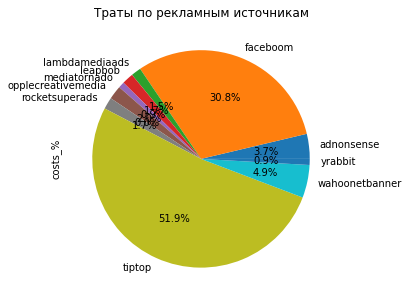

In [285]:
marketing.plot(y = 'costs_%', kind='pie', figsize=(5,5), autopct='%.1f%%', fontsize=10, legend = False,
            title ='Траты по рекламным источникам'); 

* **Краткие выводы:**

1. Как видим, наибольшее количество трат приходилось на платформу `tiptop - 54751,3 $`.\
(что составляет примерно `51.9%` от общих трат на рекламу).
2. Второй по тратам на рекламу была площадка `faceboom - 32445,6 $`\
(что составляет примерно `30.8%` от общих трат на рекламу).
3. Траты на все остальные источники рекламы не превышают 5% от общих трат на рекламу.

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

Для начала построим график динамики изменения расходов по дате в общем.

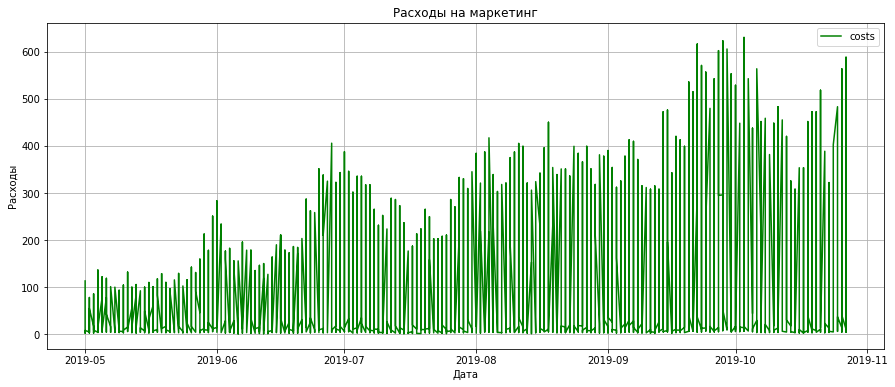

In [286]:
costs.plot(y='costs',
           x='dt',
           figsize=(15, 6), 
           grid=True,
           color = 'green',
           legend=True)

plt.title('Расходы на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

`Как видно из графика - со временем затраты на рекламу только росли`.\
`За 6 месяцев расходы на рекламу увеличились примерно в 6 раз`.\
Окупились ли такие расходы на рекламу ?? Об этом мы узнаем в следующем разделе.

Теперь посмотрим на график изменения расходов на маркетинг по каждому из рекламируемых источников.

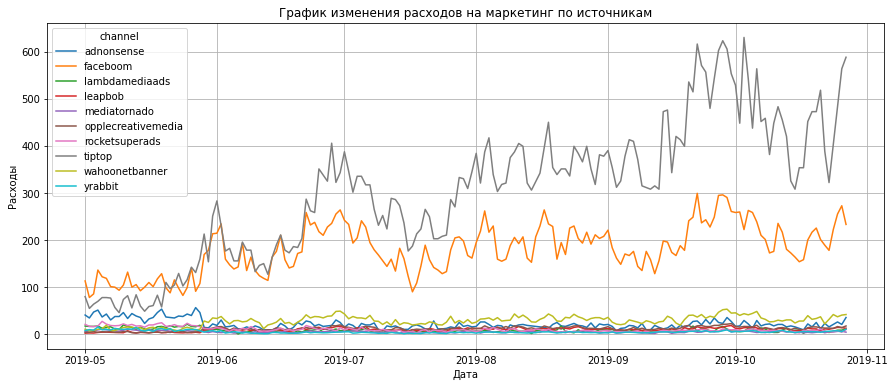

In [287]:
costs_in_time = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum' 
    )

costs_in_time.plot(
           figsize=(15, 6),
           grid=True,               
           legend=True)

plt.title('График изменения расходов на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

**Теперь построим графики изменения расходов по двум главным рекламным платформам.**

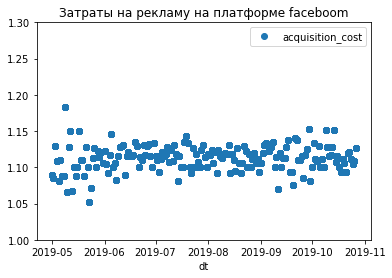

In [288]:
profiles.query('channel == "faceboom"').plot(x='dt', y='acquisition_cost', 
                                         style='o', ylim=(1, 1.3),
                                         title='Затраты на рекламу на платформе faceboom');

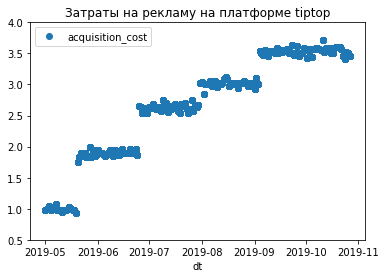

In [289]:
profiles.query('channel == "tiptop"').plot(x='dt', y='acquisition_cost', 
                                         style='o', ylim=(0.5, 4),
                                         title='Затраты на рекламу на платформе tiptop');

Построим диаграммы размаха по всем источникам.

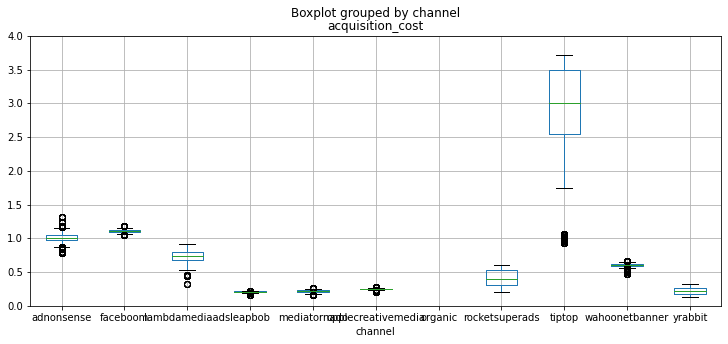

In [290]:
profiles.boxplot(by='channel', column='acquisition_cost', figsize =(12,5))
plt.ylim(0, 4);

Посчитаем медианные значения затрат на рекламу по каждому рекламному источнику.

In [291]:
profmark = profiles.groupby('channel')['acquisition_cost'].median().sort_values(ascending=False)
profmark

channel
tiptop                3.000000
faceboom              1.114667
adnonsense            1.004348
lambdamediaads        0.733333
wahoonetbanner        0.600000
rocketsuperads        0.404444
opplecreativemedia    0.250000
mediatornado          0.220926
yrabbit               0.214286
leapbob               0.210000
organic               0.000000
Name: acquisition_cost, dtype: float64

Для того чтобы построить визуализацию динамики изменения расходов по неделям и месяцам нам необходимо будет создать дополнительные колонки в нашем датайфреме. 

In [292]:
costs['date'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['date'].dt.isocalendar().week # столбец с номером недели
costs['month'] = costs['date'].dt.month # столбец с номером месяца

costs

,dt,channel,costs,date,week,month
0,2019-05-01,faceboom,113.3,2019-05-01,18,5
1,2019-05-02,faceboom,78.1,2019-05-02,18,5
2,2019-05-03,faceboom,85.8,2019-05-03,18,5
3,2019-05-04,faceboom,136.4,2019-05-04,18,5
4,2019-05-05,faceboom,122.1,2019-05-05,18,5
...,...,...,...,...,...,...
1795,2019-10-23,lambdamediaads,4.0,2019-10-23,43,10
1796,2019-10-24,lambdamediaads,6.4,2019-10-24,43,10
1797,2019-10-25,lambdamediaads,8.8,2019-10-25,43,10
1798,2019-10-26,lambdamediaads,8.8,2019-10-26,43,10


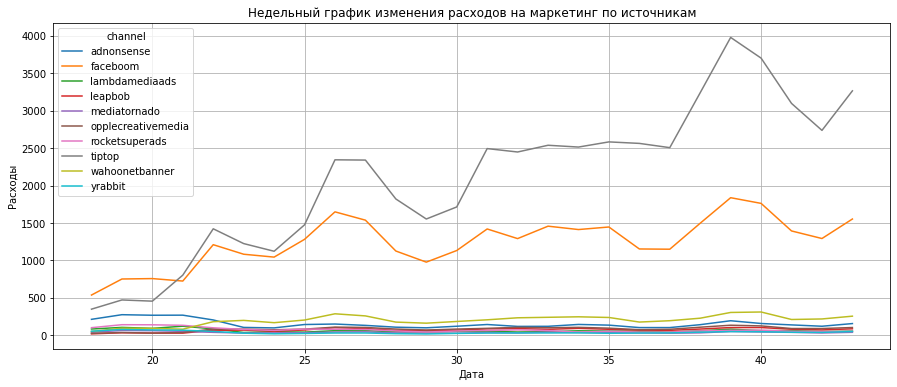

In [293]:
costs_in_time = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )

costs_in_time.plot(
           figsize=(15, 6),
           grid=True,               
           legend=True)

plt.title('Недельный график изменения расходов на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

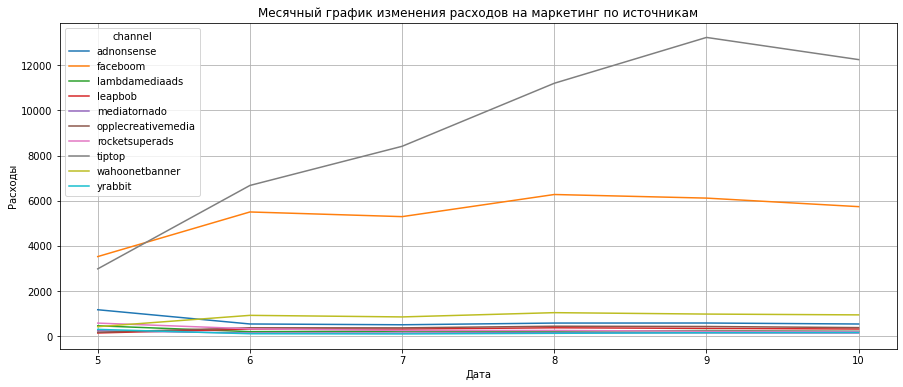

In [294]:
costs_in_time = costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    )

costs_in_time.plot(
           figsize=(15, 6),
           grid=True,               
           legend=True)

plt.title('Месячный график изменения расходов на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

* **Краткие выводы:**

1. `Как видим, в среднем затраты на рекламу со временем росли.`
2. `Наибольший рост затрат на рекламу шел на следующих 2х платформах - faceboom, tiptop`.
3. `Рост затрат шёл не равномерно. Например затраты на платформе faceboom практически всё время находились в диапазоне от 1 до 1.3 У.Е (Медианное значение затрат на рекламу - 1.11 У.Е.)`
4. `Затраты на рекламу на платформе tiptip каждый месяц росли бешенными темпами от 20% до 100%`.\
`(Как итог - медианное значение затрат на рекламу на данной платформе составило 3.0 У.Е.)`\
`(Это в 3 раза больше, чем затраты на других популярных площадках, и в 10-12 раз больше, чем затраты на всех остальных площадках).`
5. `Согласно недельному графику, наибольшие затраты на рекламу пришлись на 37-41 недели.(Сентябрь, Октябрь)`
6. `Согласно месячному графику, наибольшие затраты на рекламу пришлись на 8-10 месяцы (Август, Сентябрь, Октябрь)`


### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

Для начала рассмотрим общие значения по каждому каналу привлечения пользователей.

In [295]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 10, 27).date(), 177, dimensions=['channel']
)

roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0
channel,,,,,,,,,,,,,,,,,,,,,
adnonsense,171,1.019298,0.257659,0.377912,0.377912,0.377912,0.406540,0.406540,0.406540,0.406540,...,0.606942,0.606942,0.606942,0.606942,0.606942,0.606942,0.606942,0.606942,0.606942,0.606942
faceboom,375,1.102933,0.499492,0.559816,0.596011,0.632205,0.644270,0.656335,0.656335,0.656335,...,0.692529,0.692529,0.692529,0.692529,0.692529,0.692529,0.692529,0.692529,0.692529,0.692529
lambdamediaads,93,0.739785,1.596948,2.686192,2.903779,3.048837,3.993023,4.355814,4.428343,4.573401,...,11.609157,11.609157,11.609157,11.609157,11.681686,11.681686,11.681686,11.681686,11.681686,11.681686
leapbob,61,0.199672,0.409688,0.409688,0.409688,0.409688,0.819376,0.819376,0.819376,0.819376,...,3.277504,3.277504,3.277504,3.277504,3.277504,3.277504,3.277504,3.277504,3.277504,3.277504
mediatornado,122,0.226230,0.723188,1.084783,1.627174,1.988768,3.980797,4.161594,4.161594,4.342391,...,17.617029,17.617029,17.617029,17.617029,17.617029,17.617029,17.617029,17.617029,17.617029,17.617029
opplecreativemedia,75,0.246667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.078919,1.078919,1.078919,1.078919,1.078919,1.078919,1.078919,1.078919,1.078919,1.078919
rocketsuperads,133,0.541015,0.416093,0.693489,0.693489,0.762838,0.762838,0.762838,0.901536,0.901536,...,6.812174,6.812174,6.881523,7.645612,7.645612,7.645612,7.645612,7.714961,7.714961,7.784310
tiptop,270,0.996296,0.296803,0.519405,0.667807,0.875576,1.042528,1.153829,1.190929,1.283680,...,6.938810,6.975911,6.975911,6.975911,7.013011,7.013011,7.031561,7.031561,7.050112,7.050112
wahoonetbanner,67,0.555224,0.536559,0.938978,1.341398,1.609677,2.146237,2.280376,2.414516,2.414516,...,9.792204,9.792204,9.792204,9.792204,9.926344,9.926344,9.926344,9.926344,9.926344,9.926344


Рассмотрим значения в этой таблице за период с 2019-09-25.

In [296]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 9, 25).date(), 14, dimensions=['channel']
)

roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
adnonsense,2943,1.010754,0.480873,0.562076,0.614079,0.649307,0.669437,0.684870,0.703323,0.718421,0.740238,0.751981,0.755672,0.764060,0.775802,0.779157
faceboom,20274,1.113022,0.522469,0.591521,0.625403,0.651766,0.669461,0.680297,0.692018,0.701840,0.709182,0.716303,0.721656,0.726742,0.731611,0.735371
lambdamediaads,1617,0.729252,0.616308,0.874593,1.069250,1.234388,1.412203,1.598406,1.729588,1.831148,1.937788,2.013959,2.108752,2.180690,2.273813,2.358455
leapbob,5972,0.209754,0.541077,0.748222,0.991219,1.120289,1.245376,1.364882,1.493155,1.577607,1.749044,1.860584,1.972131,2.079695,2.167333,2.223103
mediatornado,3231,0.221281,0.587725,0.833417,1.056772,1.308157,1.491146,1.644693,1.728446,1.868049,1.979747,2.070479,2.182150,2.279862,2.356635,2.392945
opplecreativemedia,5921,0.249578,0.351189,0.479526,0.670039,0.808486,0.919919,0.997584,1.088763,1.154275,1.228625,1.302920,1.364378,1.395446,1.439344,1.479865
rocketsuperads,3255,0.453402,0.482930,0.754846,0.913760,1.049006,1.186963,1.291779,1.443999,1.555584,1.688188,1.801155,1.899887,1.977660,2.059485,2.133871
tiptop,13548,2.470571,0.139381,0.204572,0.257565,0.309367,0.351237,0.388929,0.418657,0.455606,0.483754,0.514351,0.540918,0.565100,0.587943,0.614184
wahoonetbanner,5901,0.600305,0.344611,0.509180,0.650339,0.758813,0.886168,0.973789,1.090792,1.171085,1.251389,1.320416,1.396483,1.456493,1.525517,1.580739


In [297]:
#roi_history

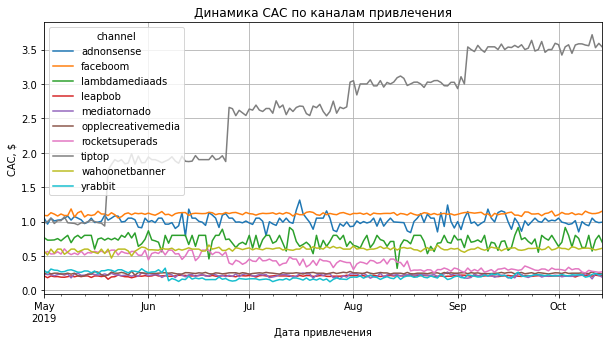

In [298]:
# строим график истории изменений CAC

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

`Как видим из графика, в среднем привлечение одного пользователя (CAC) из каждого источника стоило до 1.2 $.`\
`Стоимость привлечения одного пользователя (САС) из платформы tiptop практически ежемесячно повышалась и превысила стоимость привлечения пользователей с других платформ в среднем от 3 до 10 раз`

### ОБЩИЕ выводы по Шагу 4: 

1. Суммарно на маркетинг было потрачено **`105 497.3 $`**`
2. Наибольшее количество трат приходилось на платформу `tiptop - 54751,3 $`.\
(что составляет примерно `51.9%` от общих трат на рекламу).
3. Второй по тратам на рекламу была площадка `faceboom - 32445,6 $`\
(что составляет примерно `30.8%` от общих трат на рекламу).
4. Траты на все остальные источники рекламы не превышают 5% от общих трат на рекламу.
5. Рассмотрев графики мы обнаружили, что со временем затраты на рекламу только росли.\
За 6 месяцев общие расходы на рекламу увеличились примерно в `6 раз!!!`.
6. Наибольший рост затрат на рекламу шел на следующих 2х платформах - `faceboom, tiptop`.
7. Рост затрат шёл не равномерно. Например затраты на платформе faceboom практически всё время находились в диапазоне от 1 до 1.3\
`(Медианное значение затрат на рекламу - 1.11 $)`.
8. Затраты на рекламу на платформе `tiptip` каждый месяц росли бешенными темпами `от 20% до 100%`.\
(Как итог - медианное значение затрат на рекламу на данной платформе составило 3.0 доллара).\
(Это в 3 раза больше, чем затраты на других популярных площадках, и в 10-12 раз больше, чем затраты на всех остальных площадках).`
9. Согласно `недельному` графику, наибольшие затраты на рекламу пришлись на `37-41 недели.(Сентябрь, Октябрь)`
10. Согласно `месячному` графику, наибольшие затраты на рекламу пришлись на `8-10 месяцы (Август, Сентябрь, Октябрь)`.
11. В среднем привлечение одного пользователя (CAC) из каждого источника стоило до 1.2 $.
12. Стоимость привлечения одного пользователя (САС) из платформы tiptop практически ежемесячно повышалась и превысила стоимость привлечения пользователей с других платформ в среднем от 3 до 12 раз`

## ШАГ 5. Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей.\
Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам.\
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам.\
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.\
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


### Анализируем окупаемость рекламы с помощью графиков LTV и ROI. Строим графики динамики LTV, CAC, ROI. 

Воспользуемся ранее созданными функциями и подставим в них нужные нам значения:
- Момент анализа - 2019-11-01
- Горизонт анализа - 14 дней

Так как параметры окупаемости рекламы в основном относятся к пользователям, привлеченных рекламой, то для более корректных расчетов исключим из наблюдения органический трафик (пользователей, которые зашли в приложение без рекламы).

In [299]:
# исключаем органический трафик
profiles = profiles.query('channel != "organic"')
# зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

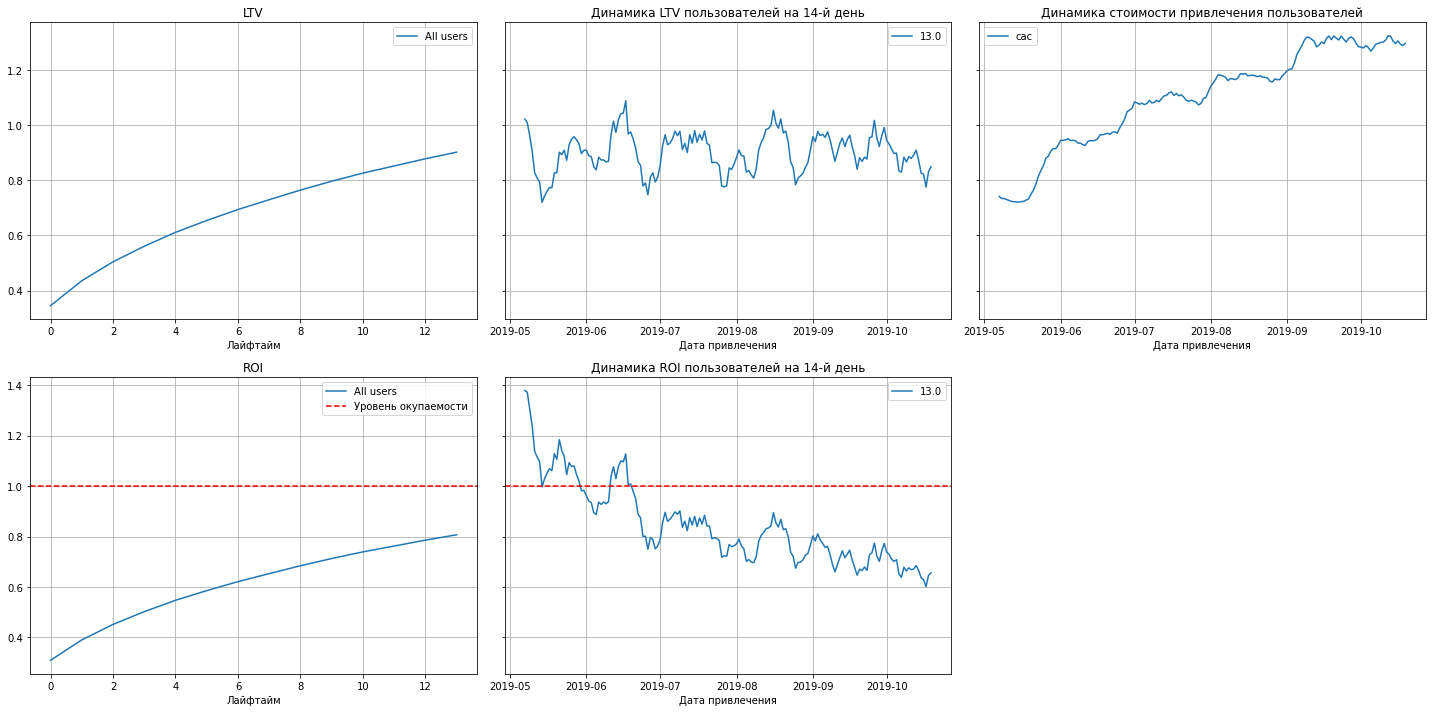

In [300]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

* **Краткие выводы после анализа графиков:**

LTV (lifetime value) — это прибыль компании, полученная от одного клиента за всё время сотрудничества с ним.\
LTV отвечает на вопрос, сколько денег вам приносит клиент.
1. В рассматриваемом периоде (за последние 2 недели) `LTV` постоянно `возрастал`. 
В среднем LTV вырос более чем в 3 раза.
2. Общая `динамика LTV` за весь рассматриваемый период распределена более-менее `равномерно`.
3. Динамика стоимости привлечения клиента (`CAC`) на всём рассматриваемом промежутке времене также `росла`.
Это означает, что затраты на рекламу для новых пользователей постоянно возрастали.
4. `ROI (ROMI)` - это коэффициент окупаемости инвестиций. И как мы могли заметить на графике:
Несмотря на то, что коэффициент окупаемости инвестиций на всем рассматриваемом периоде возрастал, в целом `инвестиции` за этот период так и `не окупились`. (Не превысили уровня окупаемости инвестиций).
Другими словами - если рассматривать только этот период времени - `инвестиции в рекламу были убыточными`.
5. `Динамика ROI` пользователей показывает как в целом менялась окупаемость инвестиций в рекламу на всём рассматриваемом периоде времени.
Мы видим, что инвестиции в рекламу окупались где-то `до середины июня`.
После этого, доходность инвестиций в рекламу постоянно падала и приносила `убытки` компании почти последние полгода.

ROI падает, так как растет привлечение

### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Для проверки конверсии пользователей, так же как и раньше воспользуемся ранее созданными функциями.
get_conversion и get_retention.

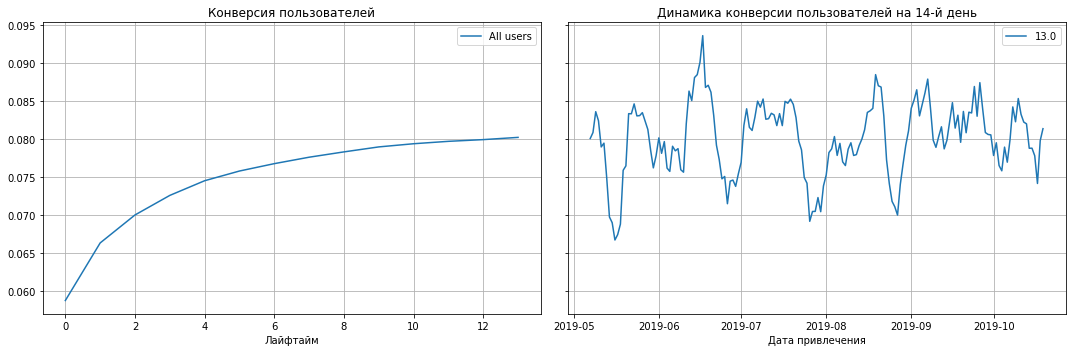

In [301]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [302]:
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


In [303]:
conversion_history.head(5)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.058974,0.066667,0.071795,0.071795,0.076923,0.076923,0.076923,0.079487,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051
2019-05-02,323,0.058824,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.071207,0.071207,0.071207,0.071207
2019-05-03,346,0.057803,0.069364,0.075145,0.078035,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.086705
2019-05-04,457,0.070022,0.074398,0.076586,0.078775,0.085339,0.085339,0.087527,0.089716,0.089716,0.091904,0.091904,0.091904,0.091904,0.091904
2019-05-05,438,0.036530,0.043379,0.047945,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511


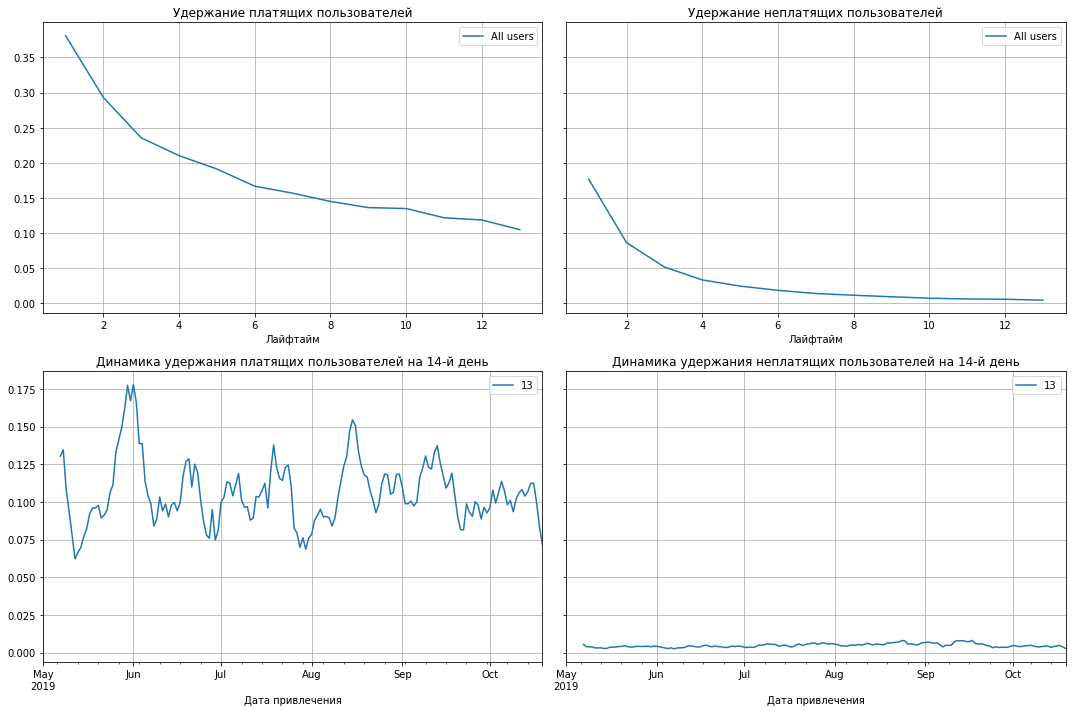

In [304]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [305]:
retention_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


In [306]:
retention_history.head(5)

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427

* **Краткие выводы:**

1. В целом, на графиках и в табличных значениям мы видим, что `конверсия пользователей со временем повышается`.(~от 0.6 до 0.8).\
т.е. другими словами количество потенциальных клиентов, которые совершавших покупку со временем возратает.\
(Ну это и не удивительно, больше пользователей - больше покупок).
2. `Динамика конверсии` пользователей носит динамичный характер (`меняется со временем`), но в целом `не имеет ярко выраженного направления к увеличению или уменьшению` конверсии.
3. `Удержание пользователей` на рассматриваемом нами периоде времене `постоянно уменьшалось`.
т.е. всё больше и больше платящих и неплатящих клиентов уходили из данного приложения.
Вероятно многим пользователям приложение чем-то не понравилось.
4. `Динамика удержания` пользователей за весь период времени так же как и динамика конверсии имела динамичный характер (менялась со временем). Здесь также нельзя точно сказать, есть ярко выраженное направление движения динамики, но мы можем заметить, что в среднем, динамика удержания для платящих клиентов немного уменьшалась со временем. Динамика удержания для неплатящих клиентов практически не менялась со временем.

### Окупаемость рекламы с разбивкой по устройствам. 

Для того, чтобы оценить окупаемость рекламы с разбивкой по устройствам, нам необходимо будет добавить в расчеты переменную dimensions со значениеми устройств - device.

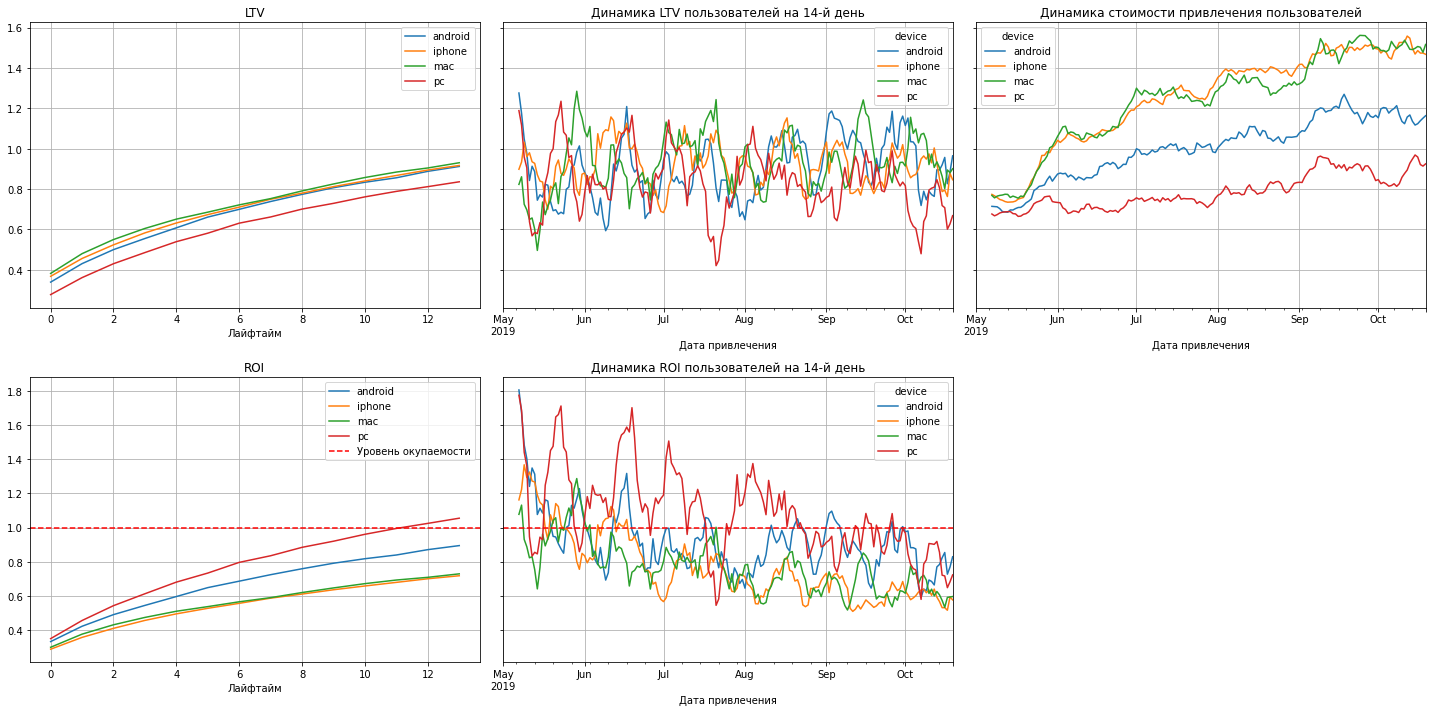

In [307]:
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [308]:
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
android,20683,0.339218,0.430766,0.500209,0.555218,0.608159,0.661395,0.699810,0.738562,0.773986,0.806850,0.833871,0.856068,0.887970,0.912098
iphone,32086,0.367928,0.456307,0.523902,0.583165,0.632132,0.673563,0.710708,0.749656,0.779956,0.812214,0.840427,0.867426,0.894400,0.916983
mac,17747,0.382235,0.480219,0.550124,0.605077,0.651197,0.685782,0.721831,0.752874,0.790957,0.825376,0.857376,0.884370,0.904617,0.930541
pc,18128,0.277400,0.361536,0.430422,0.485652,0.539617,0.581623,0.631240,0.661959,0.701004,0.729414,0.761510,0.788708,0.812106,0.836167


In [309]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
iphone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064
mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
pc,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801


* **Краткие выводы после анализа графиков:**

1. В рассматриваемом периоде (за последние 2 недели) `LTV` постоянно `возрастал` на всех платформах.\
Наименее прибыльной платформой была платформа - PC.
2. Общая `динамика LTV` за весь рассматриваемый период распределена более-менее `равномерно`.
3. Динамика стоимости привлечения клиента (`CAC`) на всём рассматриваемом промежутке времене также `росла`.\
Это означает, что затраты на рекламу для новых пользователей постоянно возрастали.\
Больше всего стоимость привлечения клиентов росла на платформах `iphone` и `mac`.
4. `ROI (ROMI)` - это коэффициент окупаемости инвестиций. И как мы могли заметить на графике:
Несмотря на то, что коэффициент окупаемости инвестиций на всем рассматриваемом периоде возрастал, в целом `инвестиции` за этот период так и `не окупились`. (Не превысили уровня окупаемости инвестиций).\
Только для пользователи платформ `PC` инвестиции в рекламу `окупились`.
5. `Динамика ROI` пользователей показывает как в целом менялась окупаемость инвестиций в рекламу на всём рассматриваемом периоде времени.\
Мы видим, что практически для всех пользователей инвестиции в рекламу окупались где-то `июля`.\
После этого, доходность инвестиций в рекламу постоянно падала и приносила `убытки` практически для всех платформ (за исключением платформ PC).\
Окупаемость инвестиций в рекламу для пользователей с платформ PC пересекла грань убыточности где-то в Сентябре-Октябре.

При этом стоит помнить, что основная масса пользователей США использует технику apple


### Окупаемость рекламы с разбивкой по странам. 

Для того, чтобы оценить окупаемость рекламы с разбивкой по странам, нам необходимо будет добавить в расчеты переменную dimensions со значениеми устройств - region.

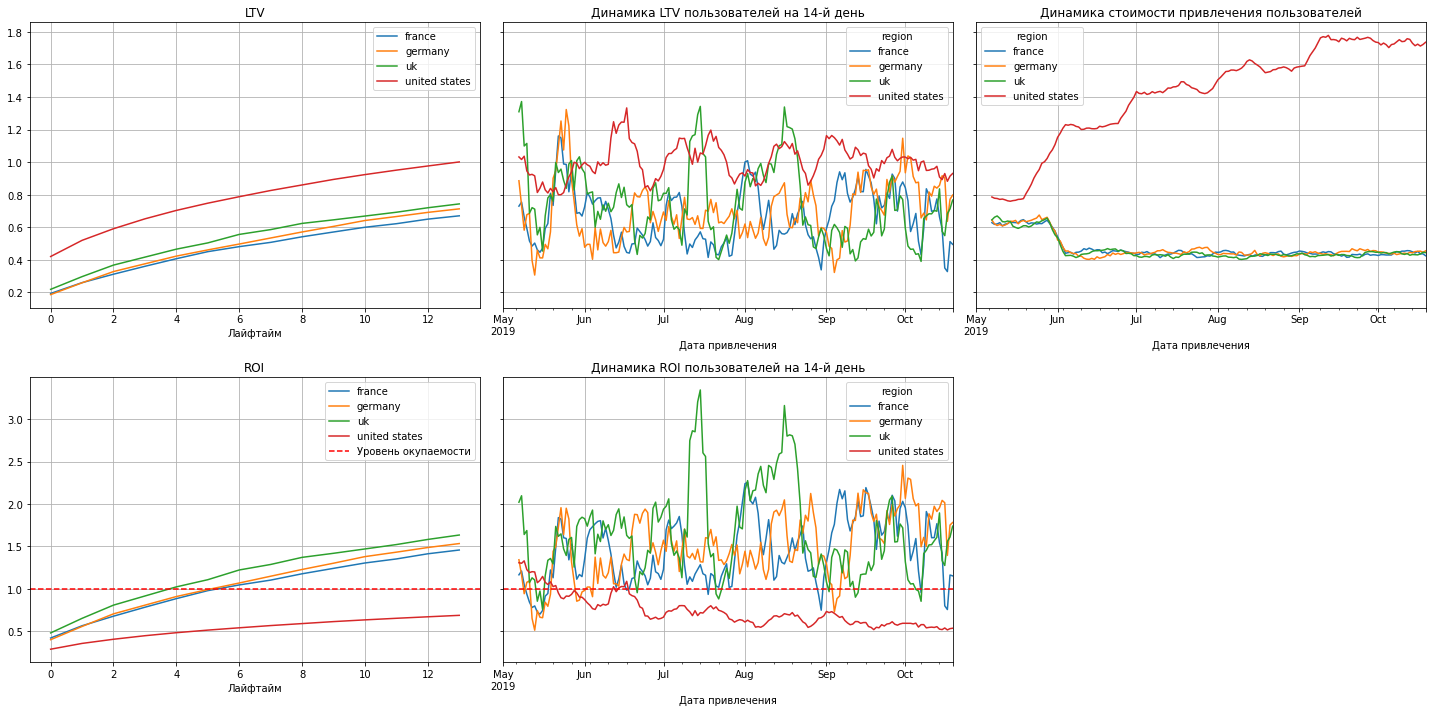

In [310]:
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

* **Краткие выводы после анализа графиков:**
    
1. `LVT` - на протяжении рассматриваемого периода постоянно `росла`.\
`Лидером по росту LTV` - оказались пользователи из региона `United States`.\
т.е. пользователи из United States принесли наибольшую прибыль приложению. 
2. Общая `динамика LTV` за весь рассматриваемый период `динамична`, без ярко выраженной направленности.
3. `Динамика стоимости привлечения пользователей` очень сильно росла в регионе - `United States`.\
Можно сказать, что только за счет пользователей из данного региона и росла общая динамика стоимости привлечения клиентов.\
т.е. `привлекать пользователей из united states со временем становилось всё менее и менее выгодно`.\
Динамика стоимости привлечения пользователей из других регионов практически не изменялась.
4. `Коэффициент окупаемости инвестиций` на рассматриваемом периоде для всех регионов `возрастал`.\
`Инвестиции в рекламу окупились` для пользователей из `UK, France, Germany.` (примерно на 4-6 день)\
Для пользователей из региона `united states` - инвестиции в рекламу так и `не окупились` за весь рассматриваемый период.
5. Практически для всех регионов инвестиции в рекламу окупались.
Исключением является регион `united states` - `динамика инвестиций в рекламу уменьшалась` с течением времени и начала приносить немалые убытки с середины июня.

### Окупаемость рекламы с разбивкой по рекламным каналам.

Для того, чтобы оценить окупаемость рекламы с разбивкой по странам, нам необходимо будет добавить в расчеты переменную dimensions со значениеми устройств - channel.

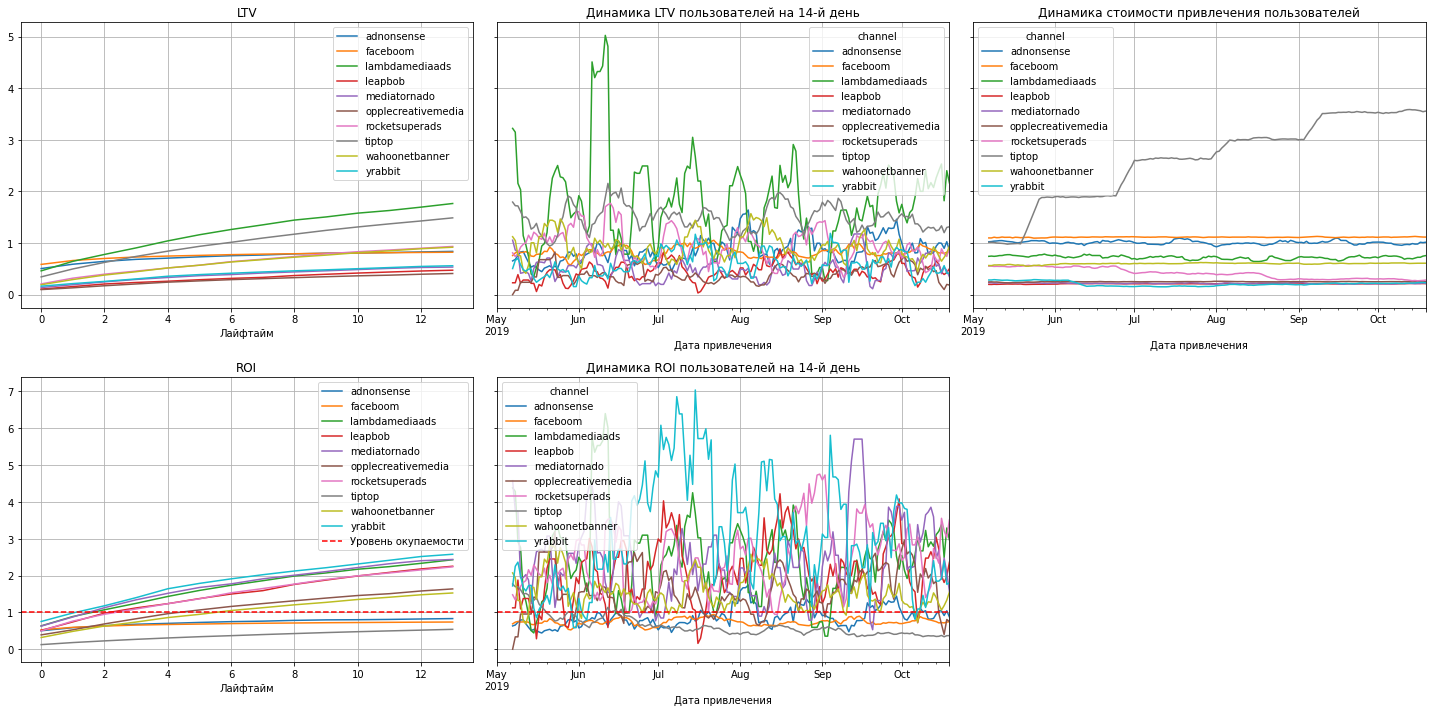

In [311]:
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

* **Краткие выводы после анализа графиков:**

1. `LVT` - на протяжении рассматриваемого периода постоянно `росла`.\
`Лидером по росту LTV` - оказались платформы `lammbdamediaads` и `tiptop`.\
т.е. пользователи из United States принесли наибольшую прибыль приложению. 
2. Общая `динамика LTV` за весь рассматриваемый период `динамична`, без ярко выраженной направленности.\
Наибольшие всплески в динамике(изменении LTV) показывает платформа `lambdamediaads`.\
Видимо на данном ресурсе происходят наиболее 'агрессивные' рекламы.
3. `Динамика стоимости привлечения пользователей` практически не изменялась со временем за исключением платформы `tiptop`\
Можно сказать, что динамика стоимости привлечения пользователей росла в основном засчет платформы `tiptop`.\
т.е. `привлекать пользователей из платформы tiptop со временем становилось всё менее и менее выгодно`.\
4. `Коэффициент окупаемости инвестиций` на рассматриваемом периоде для всех регионов `возрастал`.\
`Инвестиции в рекламу окупились` для всех платформ за исключением `tiptop`, `faceboom`, `adnonsense`.\
Инвестиции в эти платформы не успели окупить себя за 2 недели.
5. Практически для всех платформ динамика инвестиций в рекламу окупались.\
Исключением являются платформы `tiptop`, `faceboom`.\
Динамика окупаемости для данных платформ так и не смогла преодолеть планку убыточности инвестиций.

- Дорогие каналы не окупаются

### Окупается ли реклама, направленная на привлечение пользователей в целом?

Сложно дать однозначный ответ на данный вопрос так как любая реклама в первую очередь привлекает пользователей, однако она не гарантирует, что пользователям понравятся продукты приложения и как следствие, привлеченные пользователи могут не приносить прибыль.\
С другой стороны, один раз привлеченные пользователи теоретически могут принести прибыль в будущем, если они вспомнят, что могут что-то приобрести именно в данном приложении.

Если рассматривать картину в целом, то можно сказать, что:\
`В целом, реклама направленная на привлечение пользователей не окупается (убыточна)`.

Однако, как нами было обнаружено, убытки приносит не вся реклама, а только определенные её стороны.

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Нами было определено, что наибольшие финансовые убытки (негативное влиятние) приносят:

* Устройства типа: `android`, `mac`, `iphone`.


* Страны: `United States`


* Рекламные каналы: `tiptop`, `faceboom`


- Реклама для пользователей заходивших с устройства типа `PC` окупались.
- Реклама в регионах `UK`, `France`, `Germeny` окупалась.
- Реклама за исключением каналов `tiptop` и `faceboom` - в целом окупалась.

### Чем могут быть вызваны проблемы окупаемости?

Как мы определили ранее - проблемы окупаемости могут быть вызваны большим количеством проблем.\
Попробуем перечислить некоторые из этих проблем:

1. Один из главных факторов -  это `вложения в рекламу`, которая по сути `не окупают себя` полностью.\
т.е. реклама привлекает новых клиентов, но затраты на привлечение новых клиентов превышают прибыль, принесенную этими клиентами.\
В среднем, если рассматривать `двухнедельные лайфтаймы` - то можно увидеть, что реклама `окупается менее чем на 80%` от затрат на неё.\
В разделе 5.1. мы видели, что затраты на рекламу окупались в среднем до середины июня, а после приносили в основном убытки.
2. Вложения на рекламу для привлечения клиентов использующих устройства `iphone, mac и android` были неэффективными.
3. Самыми дорогими для привлечения и наименее доходными инвестициями были клиенты из Соединенных штатов (`united states`).
4. Самым не выгодным каналом для привлечения пользователей оказался канал - `tiptop`.
Динамика стоимости привлечения клиентов с данного канала увеличивалась на протяжении всего рассматриваемого периода.\
Как нами было замечено в разделе 4.3 - цены на привлечения клиентов на данной платформе увеличивались ежемесячно бешенными темпами (от 20 до 100%). Возможно руководству стоило бы задуматься о сокращений расходов на рекламу на данной платформе.
5. Платформы `faceboom` и `adnonsense` также не смогли преодолеть планку окупаемости инвестиций в рекламу.
6. Также, нами было обнаружено, что динамика удержания платящих и неплатящих клиентов постепенно уменьшалась.
т.е. компании плохо удавалось удерживать уже привлеченных клиентов.
7. Реклама на платформе `TipTop` - стоит очень дорого и совсем `не окупается.`\
Затраты на рекламу в 2 раза превышают доходность от привлеченных пользователей.
8. `Несмотря на то, что FaceBoom приводит платящих пользователей, к сожалению такие пользователи быстро уходят`.\
т.е. не получается удерживать платящих пользователей.

### Дополнительный раздел. Рассмотрение графиков по каналу `tiptop`.

In [312]:
profiles_tiptop = profiles.query('channel == "tiptop"') # оставляем срез данных, где канал привлечения 'tiptop'

In [313]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

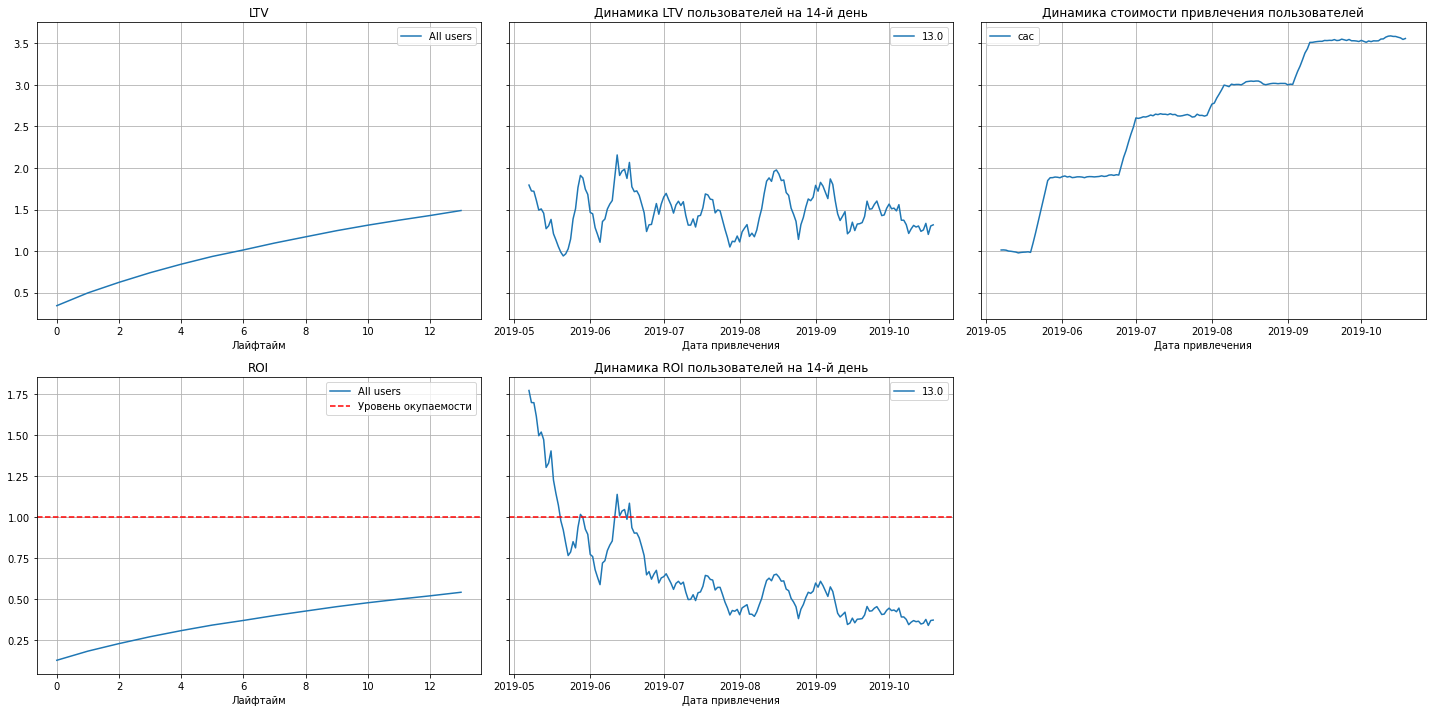

In [314]:
# считаем LTV и ROI по каналу tiptop
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_tiptop, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

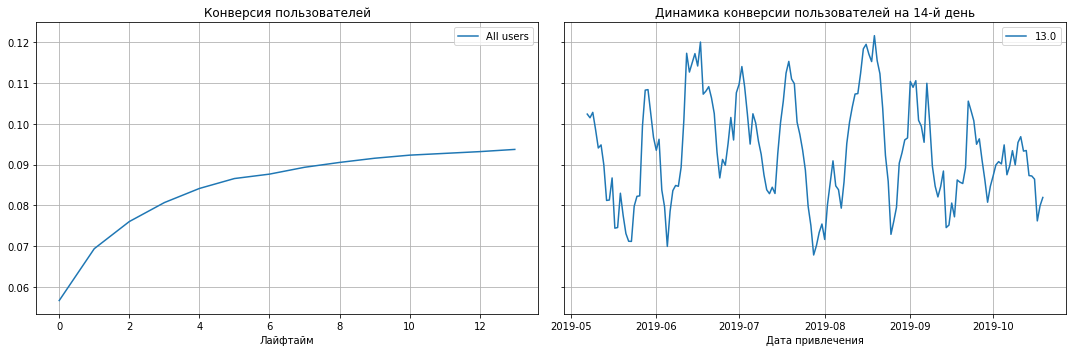

In [315]:
#рассматриваем конверсию пользователей по каналу tiptop
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_tiptop, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

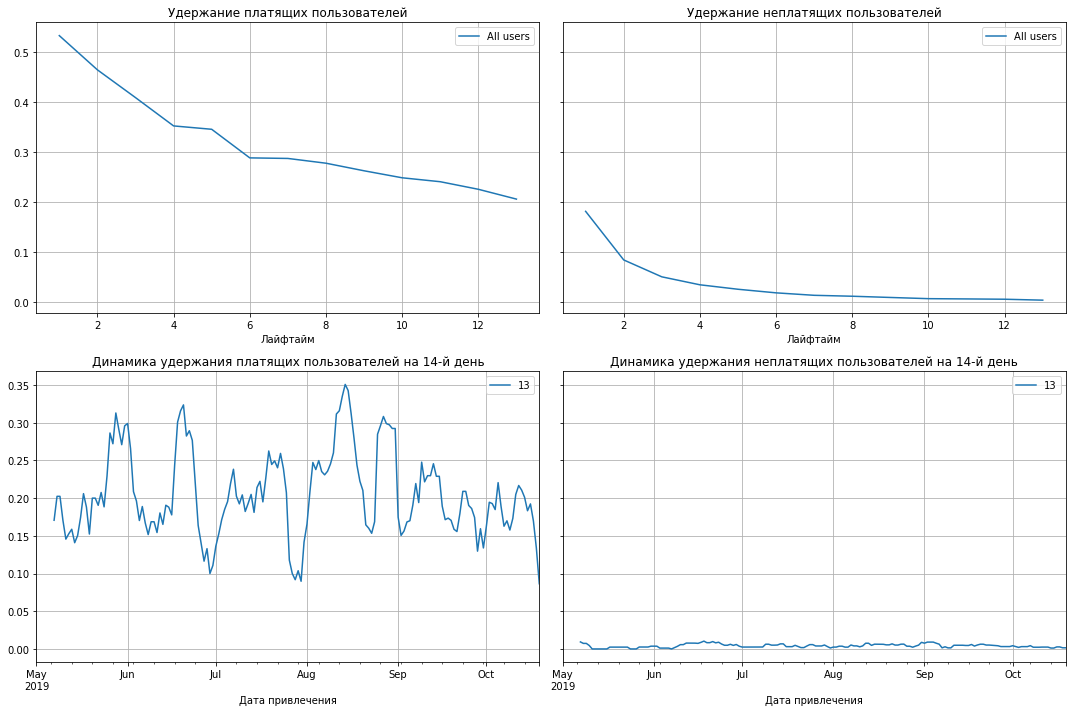

In [316]:
# рассматриваем удержание пользователей по каналу tiptop
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_tiptop, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

* **Краткие выводы по каналу привлечения пользователей - `tiptop`:**

1. В рассматриваемом периоде (за последние 2 недели) `LTV` постоянно `возрастал`. 
В среднем LTV вырос более чем в 3 раза.
2. Общая `динамика LTV` за весь рассматриваемый период распределена более-менее `равномерно`.
3. Динамика стоимости привлечения клиента (`CAC`) на всём рассматриваемом промежутке времени также `росла`.
Это означает, что затраты на рекламу для новых пользователей постоянно возрастали. Как видно на графиках - ежемесячно.
4. `ROI (ROMI)` - это коэффициент окупаемости инвестиций.\
И как мы могли заметить на графике:
Несмотря на то, что коэффициент окупаемости инвестиций на всем рассматриваемом периоде возрастал, в целом `инвестиции` за этот период так и `не окупились`. (Не превысили уровня окупаемости инвестиций).\
За рассматриваемый период видим, что затраты на рекламу окупались лишь на `~50%.`\
`т.е. затрат на привлечение пользователей было в 2 раза больше, чем доходности от этих пользователей.`
Другими словами - `инвестиции в рекламу были убыточными`.
5. `Динамика ROI` пользователей показывает как в целом менялась окупаемость инвестиций в рекламу на всём рассматриваемом периоде времени.
Мы видим, что инвестиции в рекламу окупались где-то `до середины мая`.
После этого, доходность инвестиций в рекламу на платформе tiptop падала и приносила `убытки` компании.
6. Конверсия пользователей с платформы `tiptop` медленно, но `увеличивалась` на всём рассматриваемом периоде.
7. Динамика конверсии была изменчивой, без явных направленностей.
8. `Удержание` пользователей на всём рассматриваем промежутке времени `уменьшалось.`
9. `Удержание платящих пользователей уменьшалось с 0.5 до 0.2.`
10. Динамика удержания пользователей была изменчива, но в целом, без явной направленности на увеличение или уменьшение.

### Дополнительный раздел. Рассмотрение графиков по каналу `faceboom`.

In [317]:
profiles_faceboom = profiles.query('channel == "faceboom"') # оставляем срез данных, где канал привлечения 'faceboom'

In [318]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

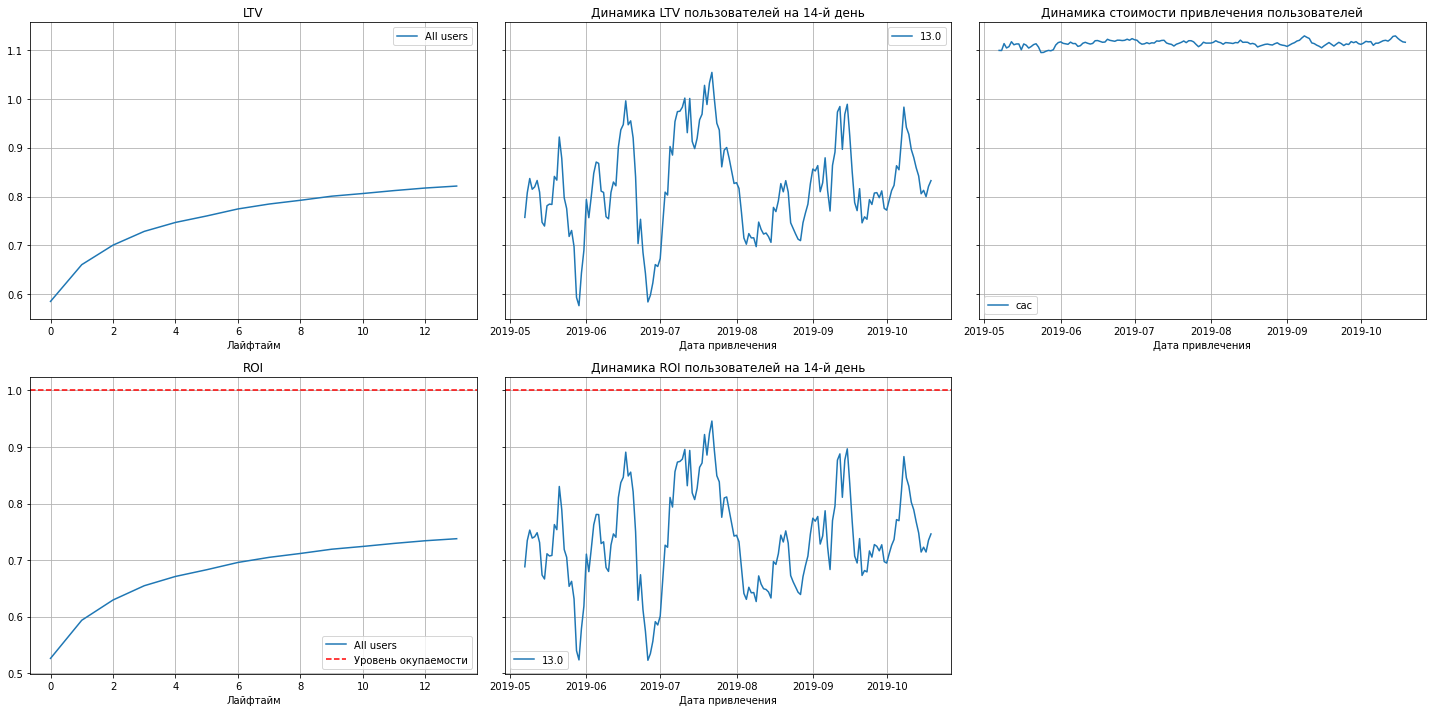

In [319]:
# считаем LTV и ROI по каналу faceboom
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_faceboom, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

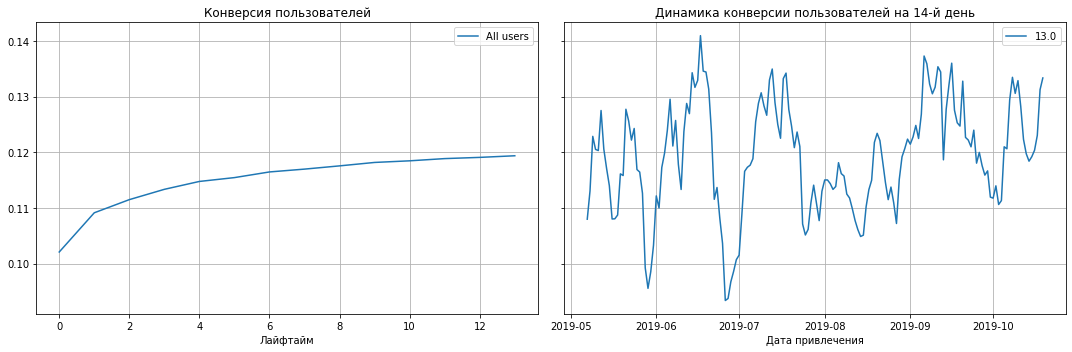

In [320]:
#рассматриваем конверсию пользователей по каналу faceboom
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_faceboom, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

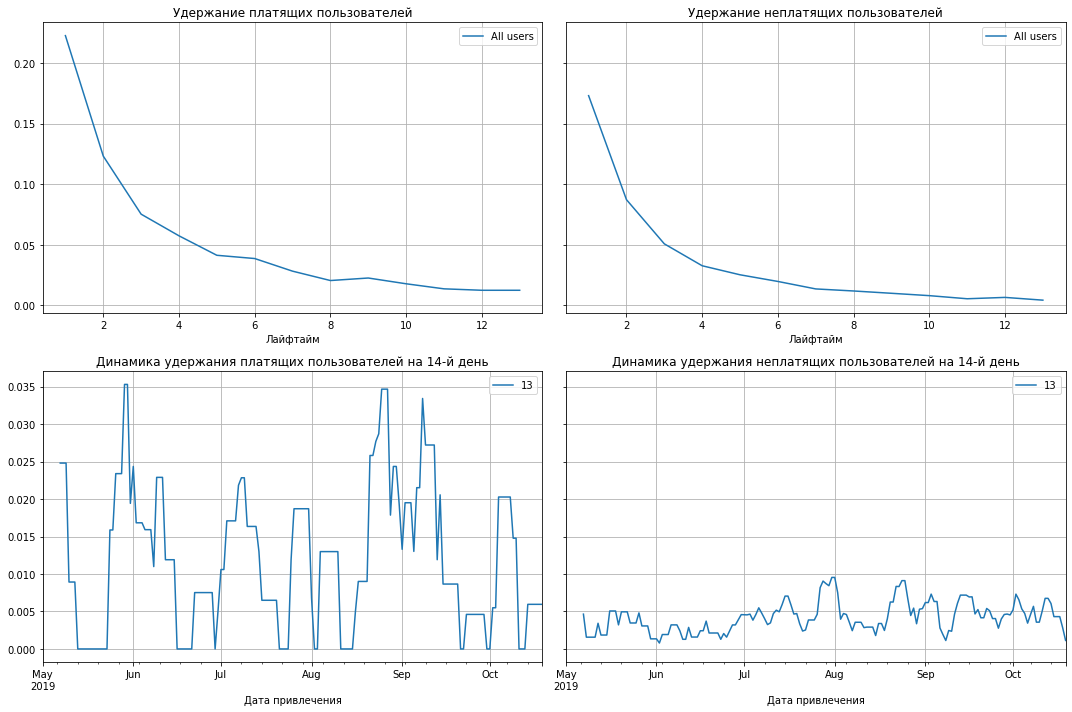

In [321]:
# рассматриваем удержание пользователей по каналу faceboom
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_faceboom, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

* **Краткие выводы по каналу привлечения пользователей - `faceboom`:**

1. В рассматриваемом периоде (за последние 2 недели) `LTV` постоянно `возрастал`. 
Но рост был небольшой.\
В среднем LTV вырос где-то на 20-30%. (это гораздо меньший рост, чем у tiptop).
2. Общая `динамика LTV` за весь рассматриваемый период распределена более-менее `равномерно`.
3. Динамика стоимости привлечения клиента (`CAC`) на всём рассматриваемом промежутке времени была примерно одинаковой.\
Сильно не изменялась.
Это означает, что затраты на рекламу для новых пользователей были примерно на одном уровне.
4. `ROI (ROMI)` - это коэффициент окупаемости инвестиций.\
И как мы могли заметить на графике:
`инвестиции` так и `не окупились`. (Не превысили уровня окупаемости инвестиций).\
За рассматриваемый период видим, что затраты на рекламу окупались лишь на `~75%.`\
`т.е. затрат на привлечение пользователей было больше, чем доходности от этих пользователей.`
Другими словами - `инвестиции в рекламу были убыточными`.
5. `Динамика ROI` пользователей показывает как в целом менялась окупаемость инвестиций в рекламу на всём рассматриваемом периоде времени.\
Как мы видим, что `инвестиции в рекламу совсем не окупались` на всем рассматриваемом промежутке времени.\
`Динамика инвестиций` так и `не смогла преодолеть планку окупаемости`.
6. Конверсия пользователей с платформы `faceboom` медленно, но `увеличивалась` на всём рассматриваемом периоде.
7. Динамика конверсии была изменчивой, но тоже со временем немного возрастала.
8. `Удержание` пользователей на всём рассматриваем промежутке времени очень сильно уменьшалось `уменьшалось.`
9. `Удержание платящих пользователей уменьшалось более чем в 10 раз.`\
Другими словами, несмотря на то, что FaceBoom приводил платящих пользователей, все они очень быстро уходили.\
`faceboom` не мог удержать данных клиентов.
10. Динамика удержания пользователей была очень сильно изменчива, но в целом, без явной направленности на увеличение или уменьшение.

## ШАГ 6. Выводы

* `Нами была проведена проектная работа по анализу бизнес показателей компании Procrastinate Pro+.`


* `Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпела убытки.` 


* `Нашей задачей было определение причин, из-за которых возникают убытки.`


* `Также, по возможности, необходимо было помочь компании выйти в плюс предоставив свои рекомендации.`

- Нами были изучены структура данных и их содержание.
- Была проведена подготовка и предобработка данных.
- Был произведен исследовательский анализ.
- Были изучены параметры окупаемости вложений в рекламу.
- Сформулированы краткие отчеты(комментарии) о возможных причинах убытков и рекомендации по их устранению.

**Исследовательский анализ данных помог нам обнаружить следующие закономерности:**

1. Общее количество уникальных пользователей у приложения "Procrastinate Pro+" - `150.008`.
2. Самая ранняя (минимальная) дата привлечения пользователя - `2019-05-01 00:00:41`
3. Cамая поздняя (максимальная) дата привлечения пользователя - `2019-10-27 23:59:04`
4. Наибольшее количество пользователей приложения находится `в соединенных штатах (united states) - ~66,67%.`
5. Количество пользователей пришедших их других регионов примерно равномерно распределено - от 9.99% до 11.72%.
6. Наибольшее количество платящих пользователей приходится также на `соединенные штаты (united states) - ~77.7%.`
7. Количество платящих пользователей из других регионов также примерно равномерно распределено - от 6.9% до 7.9%.
8. Наибольшая доля платящих клиентов приходится на пользователей находящихся в соединненых штатах (`united states`).\
`(~6.9%` в абсолютном выражении (6902 из 100002)
9. Если сравнивать относительные значения между странами - то наибольшая доля платящих пользователей также находятся `в соединенных штатах - 36.7%`. (В остальных странах в среднем только ~ 1 из 5 уникальных пользователей платит `(~20%)`)
10. Наибольшая доля уникальных пользователей совершили свой первый вход в приложение с устройств типа- `iphone (почти ~36.3%)`.
11. Распределние между оставшимися устройствами `практически равномерное (от 20% до 23.4%)`.
12. Наибольшая доля уникальных пользователей совершивших покупки, покупала с устройств типа - `iphone (почти ~38.1%)`.
13. Распределние между оставшимися устройствами `практически равномерное (от 17.3% до 23.1%)`.
14. Несмотря на то, что наибольшая доля платящих пользователей заходила с устройств типа - iphone, доля платящих пользователей к общему количеству уникальных пользователей распределяется примерно равномерно.
15. Другими словами, `сложно сказать, зависит ли напрямую тип устройства, с которого производится оплата на оплату в целом.`\
По предварительным наблюдениям - не зависит.
16. Наибольшее количество пользователей запустивших приложение являются `органическими/organic` (т.е. те, которые пришли без всякой рекламы) - `примерно (~38%).`
17. Из рекламных источников, наибольшее количество пользователей пришли с ресурса - `faceboom (~19%)`
18. На втором месте по привлечению пользователей оказался ресурс - `tiptop (~13%)`
19. Все остальные ресурсы приводили до `6%` пользователей
20. Самый неэффективный ресурс в плане привлечения пользователей - `lambdamediaads (~1.43%)`.
21. Наибольшее количество платящих пользователей были привлечены рекламой с источника - `faceboom (~40%).`
22. На втором месте по привлечению платящих пользователей оказался ресурс - `tiptop (~21%)`.
23. Уникальных платящих пользователей, пришедших `без рекламы` было около `~13%`
24. Со всех оставшихся ресурсов платящих пользователей приходило не более `5.1%`
25. Самый неэффективный ресурс в плане привлечения платящих пользователей - `mediatornado (~1.76%)`.
26. Наибольшая доля платящих клиентов пришли с ресурса - `faceboom (~16.9%)`.
27. Следущие ресурсы тоже привлекли не мало платящих клиентов: `('adnonsense', 'lambdamediaads','tiptop').`\
`От 11% до 15.7%` уникальных пользователей пришедших с данных ресурсов совершали покупки.
28. Остальные ресурсы привлекали гораздо меньше пользователей, совершаших покупки - до `7.4%` от общей доли.
29. Наименьшая доля пользователей совершавших покупки (в относительных выражениях), приходила без рекламы - `~2.9%`

### Причины неэффективности привлечения пользователей.

1. Суммарно на маркетинг было потрачено **`105 497.3 $`**`
2. Наибольшее количество трат приходилось на платформу `tiptop - 54751,3 $`.\
(что составляет примерно `51.9%` от общих трат на рекламу).
3. Второй по тратам на рекламу была площадка `faceboom - 32445,6 $`\
(что составляет примерно `30.8%` от общих трат на рекламу).
4. Траты на все остальные источники рекламы не превышают 5% от общих трат на рекламу.
5. Рассмотрев графики мы обнаружили, что со временем затраты на рекламу только росли.\
За 6 месяцев общие расходы на рекламу увеличились примерно в `6 раз!!!`.
6. Наибольший рост затрат на рекламу шел на следующих 2х платформах - `faceboom, tiptop`.
7. Рост затрат шёл не равномерно. Например затраты на платформе faceboom практически всё время находились в диапазоне от 1 до 1.3\
`(Медианное значение затрат на рекламу - 1.11 $)`.
8. Затраты на рекламу на платформе `tiptip` каждый месяц росли бешенными темпами `от 20% до 100%`.\
(Как итог - медианное значение затрат на рекламу на данной платформе составило 3.0 доллара).\
(Это в 3 раза больше, чем затраты на других популярных площадках, и в 10-12 раз больше, чем затраты на всех остальных площадках).`
9. Согласно `недельному` графику, наибольшие затраты на рекламу пришлись на `37-41 недели.(Сентябрь, Октябрь)`
10. Согласно `месячному` графику, наибольшие затраты на рекламу пришлись на `8-10 месяцы (Август, Сентябрь, Октябрь)`.
11. В среднем привлечение одного пользователя (CAC) из каждого источника стоило до 1.2 $.
12. Стоимость привлечения одного пользователя (САС) из платформы `tiptop` практически ежемесячно повышалась и превысила стоимость привлечения пользователей с других платформ в среднем от 3 до 12 раз`.

13. Один из главных факторов неэффективности привлечения пользователей  это `вложения в рекламу`, которая по сути `не окупают себя` полностью.\
т.е. реклама привлекала новых клиентов, но затраты на привлечение новых клиентов превышали прибыль, принесенную этими клиентами.\
В среднем, если рассматривать `двухнедельные лайфтаймы` видно, что реклама `окупается менее чем на 80%` от затрат на неё.\
14. Вложения в рекламу были не всегда неэффективными.\
т.е. затраты на рекламу до середины июня в принципе стабильно окупались, и только после этого начали приносить в основном убытки.
15. Как показали графики, вложения на рекламу для привлечения клиентов использующих устройства `iphone, mac и android` были неэффективными.
16. Самыми дорогими для привлечения и наименее доходными инвестициями были клиенты из Соединенных штатов (`united states`).
17. Самым не выгодным каналом для привлечения пользователей оказался канал - `tiptop`.
Динамика стоимости привлечения клиентов с данного канала увеличивалась на протяжении всего рассматриваемого периода.\
Как нами было замечено ранее - цены на привлечения клиентов на данной платформе увеличивались ежемесячно бешенными темпами (от 20 до 100%).
18. Платформы `faceboom` и `adnonsense` также не смогли преодолеть планку окупаемости инвестиций в рекламу.
19. Также, нами было обнаружено, что динамика удержания платящих и неплатящих клиентов постепенно уменьшалась со временем.\
20. Реклама на платформе `TipTop` - стоит очень дорого и совсем `не окупается.`\
Затраты на рекламу в 2 раза превышают доходность от привлеченных пользователей.
21. `Несмотря на то, что FaceBoom приводит платящих пользователей, к сожалению такие пользователи быстро уходят`.\
т.е. не получается удерживать платящих пользователей.

### Рекомендации для отдела маркетинга.

1. Первая, и, наверно, самая главная рекомендация - это глобально сократить расходы на рекламу на платформе `tiptop`.\
Несмотря на то, что данная платформа привлекает немало платящих клиентов, она же и является наиболее убыточной.\
Учитывая что расходы на рекламу на данной площадке ежемесячно увеличиваться в ограмных масштабах.
Затраты на рекламу превышают доходность от пользователей более чем в 2 раза !!!
2. Также рекомендуется немного сократить затраты на рекламу на платформах `faceboom` и `adnonsesnse`.
3. Несмотря на то, что `FaceBoom` приводит платящих пользователей, к сожалению такие пользователи быстро уходят.\
т.е. не получается удерживать платящих пользователей.\
`Рекомендация - попробовать удержать тех пользователей, которые уже являются клиентами компании.`
4. Возможно небольшое увеличение затрат на рекламу на платформах `wahoonetbanner` и `rocketsuperads` себя оправдало бы.
5. Платформа `yrabbit` показала очень хорошую доходность при небольшом количестве затрат на рекламу.\
Но в то же время данная платформа привлекает не так много пользователей, как хотелось бы.\
Думаю небольшое увеличение затрат на данную платформу также могло бы принести неплохие результаты.
6. Учитывая, что затраты на привлечение пользователей с Европейских регионов в основном себя оправдывали, можно попробовать сосредоточиться на увеличении сегмента пользователей из данных регионов (`UK`,`France`, `Germany`).
7. Также, учитывая что динамика удержания платящих и неплатящих клиентов постепенно уменьшалась со временем, рекомендуется попробовать `сосредоточить свои усилия на увеличении коэффициента удержания пользователей`.\
(Особенно пользователей, пришедших с платформы `faceboom`).\
Для этого возможно потребуется провести какие-нибудь дополнительные промоакции к тем пользователям, которые уже пользовались приложением компании.
8. Учитывая, что затраты на рекламу для пользователей, использующих устройства `iphone`, `mac`, `android` не успевают себя окупить за две недели, рекомендуется уделить особое внимание данному аспекту и попробовать решить эту проблему.\
Возмозно у данных пользователей возникают какие-то проблемы с оплатой товаров.\
Если же никаких технических неполадок не обнаружится, можно будет попробовать немного сократить расходы на рекламу данному сегменту пользователей и посмотреть какие результаты будут получены.


А еще можно повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.